In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
from pprint import pprint

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)
bat_df = pd.read_csv("../Data/Corpus_csv/batters_all_career.csv")

In [5]:
bat_df.head()

Id             Name  Active  First year  Last year  \
0    Aaron_Altherr_320    Aaron Altherr   False        2014       2019   
1       Abe_Atkins_626       Abe Atkins   False        1923       1923   
2  Abiatal_Avelino_670  Abiatal Avelino   False        2018       2019   
3  Abraham_Almonte_292  Abraham Almonte    True        2013       2021   
4             Adams_69            Adams   False        1942       1942   

                                                 Url      Country  \
0  https://www.baseball-reference.com//players/a/...           de   
1  https://www.baseball-reference.com//players/a/...           us   
2  https://www.baseball-reference.com//players/a/...           do   
3  https://www.baseball-reference.com//players/a/...           do   
4  https://www.baseball-reference.com//players/a/...  desconocido   

      Bat hand   Throw hand             Full Name  HoF HoF type HoF year  \
0        Right        Right  Aaron Samuel Altherr    0        -        -   
1  desconocido  desconocido            Abe Atkins    0        -        -   
2        Right        Right       Abiatal Avelino    0        -        -   
3         Both        Right       Abraham Almonte    0        -        -   
4  desconocido  desconocido           desconocido    0        -        -   

  HoF comittee  Player type retirement_age  total_seasons  \
0            -            2             28              6   
1            -            2             29              1   
2            -            2             24              2   
3            -            2             32              9   
4            -            2    desconocido              1   

                                 career_teams career_leagues first_position  \
0                                     ['PHI']         ['NL']             OF   
1                                      ['TT']        ['NNL']             3B   
2                                     ['SFG']         ['NL']             SS   
3  ['SEA', 'CLE', 'KCR', 'ARI', 'SDP', 'ATL']   ['AL', 'NL']             OF   
4                                     ['MRS']        ['NAL']              C   

  second_position  play_in_mayors  play_in_negro_league  two_way_player  \
0               -               1                     0               0   
1               -               0                     1               0   
2              2B               1                     0               0   
3               -               1                     0               0   
4               -               0                     1               0   

   debut_decade  retirament_decade  2B_bt  3B_bt   AB_bt  BA_bt  BB_bt  CS_bt  \
0          2010               2010   54.0   10.0  1016.0  0.219  110.0   10.0   
1          1920               1920    0.0    0.0     1.0  0.000    0.0    NaN   
2          2010               2010    0.0    0.0    18.0  0.278    1.0    0.0   
3          2010               2020   70.0   13.0  1186.0  0.234  117.0    9.0   
4          1940               1940    0.0    0.0     0.0    NaN    0.0    NaN   

    G_bt  HR_bt   H_bt  IBB_bt  OBP_bt  OPS+_bt  OPS_bt   PA_bt  RAA_bt  \
0  359.0   37.0  222.0     4.0   0.307     88.0   0.708  1156.0   -17.0   
1    1.0    0.0    0.0     NaN   0.000   -100.0   0.000     2.0    -1.0   
2   10.0    0.0    5.0     0.0   0.316     65.0   0.594    19.0    -1.0   
3  440.0   23.0  278.0     1.0   0.302     82.0   0.676  1326.0   -32.0   
4    1.0    0.0    0.0     NaN     NaN      NaN     NaN     0.0     0.0   

   RAR_bt  RBI_bt   R_bt  Rbaser_bt  Rbat_bt  Rdp_bt  Rfield_bt  Rpos_bt  \
0    21.0   150.0  142.0        1.0    -14.0    -1.0        7.0    -10.0   
1    -1.0     0.0    0.0        0.0     -1.0     0.0        0.0      0.0   
2    -1.0     1.0    1.0       -1.0     -1.0     0.0        0.0      0.0   
3    14.0   116.0  161.0        1.0    -32.0     2.0        2.0     -6.0   
4     0.0     0.0    0.0        0.0      0.0     0.0        0.0      0.0   

   Rrep_bt  SB_

In [6]:
bat_df.shape

(12525, 78)

In [7]:
from Preprocessing.data_keys import headers_bio, headers_bat

In [8]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [9]:
bat_df['retirement_age'] = (
        bat_df['retirement_age'].replace('desconocido', bat_df['retirement_age'].mode()[0])
    )
bat_df['retirement_age'] = bat_df['retirement_age'].astype('int64')

In [10]:
gt_conditions = {
    "total_seasons":3,
    'G_bt':100,
    'BA_bt':0.2,
}
eq_conditions = {
    "HoF type":['-','Player']
}
filter_df = filter_dataset(bat_df, eq_conditions,gt_conditions, None, None)

In [11]:
filter_df.shape

(5761, 78)

In [12]:
for h in headers_bat:
    nan = filter_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{filter_df[h].isna().sum()}")
        #print(f"{h}:{bat_df[h].isna().sum()}")

CS_bt:True --->891
IBB_bt:True --->1306
SB_bt:True --->29
SF_bt:True --->2099
SH_bt:True --->292
SO_bt:True --->347
CS%_fd:True --->4748
CS_fd:True --->4073
PB_fd:True --->4474
SB_fd:True --->4073
WP_fd:True --->4474


In [13]:
print(filter_df['HoF'].value_counts())

0    5576
1     185
Name: HoF, dtype: int64


In [14]:
inactives_cond = {"Active":[False]}
inactive_bat_df = filter_dataset(filter_df, inactives_cond, None, None, None) 

In [15]:
inactive_bat_df.shape

(5330, 78)

In [16]:
print(inactive_bat_df['HoF'].value_counts())

0    5145
1     185
Name: HoF, dtype: int64


In [17]:
negro_league_condition = {
    'play_in_negro_league':[1]
}
negro_lg_bat_df = filter_dataset(filter_df, negro_league_condition, None, None, None)

In [18]:
negro_lg_bat_df.shape

(378, 78)

In [19]:
negro_lg_bat_df.describe()

First year    Last year         HoF  Player type  retirement_age  \
count   378.000000   378.000000  378.000000        378.0      378.000000   
mean   1929.007937  1939.296296    0.063492          2.0       34.150794   
std       8.260188     9.750578    0.244169          0.0        5.605133   
min    1920.000000  1922.000000    0.000000          2.0       20.000000   
25%    1922.000000  1930.250000    0.000000          2.0       30.000000   
50%    1926.000000  1940.000000    0.000000          2.0       34.000000   
75%    1936.000000  1947.000000    0.000000          2.0       37.000000   
max    1948.000000  1980.000000    1.000000          2.0       58.000000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count     378.000000      378.000000                 378.0           378.0   
mean        8.775132        0.203704                   1.0             0.0   
std         4.243230        0.403285                   0.0             0.0   
min         3.000000        0.000000                   1.0             0.0   
25%         5.000000        0.000000                   1.0             0.0   
50%         8.000000        0.000000                   1.0             0.0   
75%        11.000000        0.000000                   1.0             0.0   
max        23.000000        1.000000                   1.0             0.0   

       debut_decade  retirament_decade       2B_bt       3B_bt         AB_bt  \
count    378.000000         378.000000  378.000000  378.000000    378.000000   
mean    1925.634921        1933.968254   54.738095   18.142857   1244.298942   
std        7.373625           9.832499   58.056340   17.852199   1129.903124   
min     1920.000000        1920.000000    5.000000    0.000000    296.000000   
25%     1920.000000        1930.000000   21.000000    7.000000    550.250000   
50%     1920.000000        1940.000000   33.500000   12.000000    879.000000   
75%     1930.000000        1940.000000   68.500000   22.750000   1620.000000   
max     1940.000000        1980.000000  525.000000  141.000000  10924.000000   

            BA_bt        BB_bt       CS_bt        G_bt       HR_bt  \
count  378.000000   378.000000   67.000000   378.00000  378.000000   
mean     0.277611   122.494709   10.716418   354.42328   20.904762   
std      0.034308   148.189950   25.866678   312.28026   48.338236   
min      0.200000     8.000000    0.000000   100.00000    0.000000   
25%      0.255250    46.250000    0.000000   164.00000    3.000000   
50%      0.275000    74.000000    0.000000   251.00000    7.500000   
75%      0.300000   144.500000    6.000000   449.50000   18.000000   
max      0.408000  1468.000000  130.000000  3005.00000  660.000000   

              H_bt      IBB_bt      OBP_bt     OPS+_bt      OPS_bt  \
count   378.000000  161.000000  378.000000  378.000000  378.000000   
mean    356.185185    5.204969    0.340960   98.285714    0.724937   
std     342.392956   21.765546    0.038709   29.351756    0.111725   
min      66.000000    0.000000    0.251000   34.000000    0.491000   
25%     147.250000    0.000000    0.315000   77.250000    0.647000   
50%     240.500000    0.000000    0.340000   96.000000    0.712500   
75%     455.000000    1.000000    0.363750  115.750000    0.798750   
max    3293.000000  214.000000    0.492000  214.000000    1.178000   

              PA_bt       RAA_bt       RAR_bt       RBI_bt         R_bt  \
count    378.000000   378.000000   378.000000   378.000000   378.000000   
mean    1409.235450    16.097884    63.026455   184.267196   207.277778   
std     1302.874378    91.620127   126.608293   201.169591   215.635400   
min      316.000000  -125.000000   -60.000000    19.000000    28.000000   
25%      609.750000   -21.000000     5.000000    71.000000    80.000000   
50%      991.000000    -3.000000    24.500000   110.500000   131.000000   
75%     1827.500000    23.000000    72.750000   228.250000   255.000000   
max    12545.000000  1039.000000  149

In [20]:
negro_lg_bat_df['HoF'].value_counts()

0    354
1     24
Name: HoF, dtype: int64

In [21]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
mL_gt_cond = {
    'WAR_bt':10
}
mayors_lg_bat_df = filter_dataset(filter_df, mayor_league_condition, mL_gt_cond, None, None)

In [22]:
mayors_lg_bat_df.shape

(1670, 78)

In [23]:
drop_recent_election_cond = {
    'retirament_decade':2009
}
inactive_mayors_lg_bat_df = filter_dataset(inactive_bat_df, mayor_league_condition, mL_gt_cond, drop_recent_election_cond, None)

In [24]:
inactive_mayors_lg_bat_df.shape

(1290, 78)

In [25]:
inactive_mayors_lg_bat_df.describe()

First year    Last year          HoF  Player type  retirement_age  \
count  1290.000000  1290.000000  1290.000000       1290.0     1290.000000   
mean   1945.393798  1958.806977     0.125581          2.0       35.452713   
std      35.283710    35.458549     0.331506          0.0        3.501924   
min    1871.000000  1877.000000     0.000000          2.0       26.000000   
25%    1915.000000  1929.000000     0.000000          2.0       33.000000   
50%    1951.000000  1966.000000     0.000000          2.0       35.000000   
75%    1976.000000  1989.750000     0.000000          2.0       37.000000   
max    2001.000000  2009.000000     1.000000          2.0       56.000000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count    1290.000000          1290.0           1290.000000      1290.00000   
mean       13.723256             1.0              0.015504         0.00155   
std         3.724013             0.0              0.123593         0.03936   
min         4.000000             1.0              0.000000         0.00000   
25%        11.000000             1.0              0.000000         0.00000   
50%        13.000000             1.0              0.000000         0.00000   
75%        16.000000             1.0              0.000000         0.00000   
max        27.000000             1.0              1.000000         1.00000   

       debut_decade  retirament_decade        2B_bt        3B_bt  \
count   1290.000000        1290.000000  1290.000000  1290.000000   
mean    1941.031008        1954.093023   248.341085    56.176744   
std       35.391293          35.442332   115.239414    40.204343   
min     1870.000000        1870.000000    36.000000     2.000000   
25%     1910.000000        1920.000000   164.000000    28.000000   
50%     1950.000000        1960.000000   226.000000    47.000000   
75%     1970.000000        1987.500000   307.750000    73.000000   
max     2000.000000        2000.000000   792.000000   309.000000   

              AB_bt        BA_bt        BB_bt        CS_bt         G_bt  \
count   1290.000000  1290.000000  1290.000000  1133.000000  1290.000000   
mean    5209.704651     0.277590   545.475194    49.409532  1483.337984   
std     1980.567779     0.023239   300.894693    38.169049   514.340554   
min     1292.000000     0.217000    10.000000     0.000000   307.000000   
25%     3774.000000     0.262000   342.250000    22.000000  1112.000000   
50%     4913.000000     0.275000   471.000000    39.000000  1415.500000   
75%     6442.500000     0.291000   677.500000    66.000000  1800.750000   
max    14053.000000     0.366000  2558.000000   335.000000  3562.000000   

             HR_bt         H_bt      IBB_bt       OBP_bt      OPS+_bt  \
count  1290.000000  1290.000000  982.000000  1290.000000  1290.000000   
mean    120.444186  1458.346512   50.461303     0.348319   110.044186   
std     114.498307   609.588965   48.180302     0.028991    18.596330   
min       0.000000   423.000000    0.000000     0.265000    65.000000   
25%      40.000000  1004.750000   21.000000     0.329000    98.000000   
50%      85.000000  1339.500000   38.000000     0.347000   109.000000   
75%     163.000000  1803.750000   65.000000     0.366000   121.000000   
max     762.000000  4256.000000  688.000000     0.482000   206.000000   

            OPS_bt         PA_bt       RAA_bt      RAR_bt       RBI_bt  \
count  1290.000000   1290.000000  1290.000000  1290.00000  1290.000000   
mean      0.761171   5888.166667    98.755039   295.71938   694.564341   
std       0.076257   2251.045122   154.673295   206.77849   354.156879   
min       0.542000   1430.000000  -179.000000    93.00000    92.000000   
25%       0.711000   4238.500000     7.000000   152.00000   428.250000   
50%       0.757000   5528.500000    54.000000   224.50000   598.500000   
75%       0.806000   7236.750000   145.750000   369.00000   876.750000   
max       1.164000  15890.000000  1326.000000  1703.00000  2297.000000  

In [26]:
elegible_per_ten_year_cond = {
    "total_seasons":10,
}

inactive_plus_10_season = filter_dataset(inactive_mayors_lg_bat_df, None,elegible_per_ten_year_cond, None, None)


In [27]:
inactive_plus_10_season.shape

(1136, 78)

In [28]:
inactive_plus_10_season.reset_index(inplace=True, drop=True)

In [29]:
from Preprocessing.data_frame_procces import separete_steroids_players

inactive_plus_10_season, steroids_p_df = separete_steroids_players(inactive_plus_10_season)

In [30]:
steroids_p_df.describe()

First year    Last year   HoF  Player type  retirement_age  \
count    20.00000    20.000000  20.0         20.0       20.000000   
mean   1988.45000  2002.750000   0.0          2.0       36.300000   
std       5.18576     4.788968   0.0          0.0        2.536056   
min    1972.00000  1987.000000   0.0          2.0       33.000000   
25%    1986.00000  2001.750000   0.0          2.0       35.000000   
50%    1988.50000  2003.000000   0.0          2.0       36.000000   
75%    1991.00000  2005.250000   0.0          2.0       37.500000   
max    1998.00000  2009.000000   0.0          2.0       42.000000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count      20.000000            20.0                  20.0            20.0   
mean       15.250000             1.0                   0.0             0.0   
std         3.274704             0.0                   0.0             0.0   
min        11.000000             1.0                   0.0             0.0   
25%        12.000000             1.0                   0.0             0.0   
50%        15.000000             1.0                   0.0             0.0   
75%        17.000000             1.0                   0.0             0.0   
max        22.000000             1.0                   0.0             0.0   

       debut_decade  retirament_decade       2B_bt      3B_bt        AB_bt  \
count     20.000000          20.000000   20.000000  20.000000    20.000000   
mean    1983.500000        1998.500000  311.400000  30.650000  5907.850000   
std        5.871429           4.893605   99.545493  18.798866  1719.800701   
min     1970.000000        1980.000000  167.000000   7.000000  3769.000000   
25%     1980.000000        2000.000000  261.750000  17.500000  4480.250000   
50%     1980.000000        2000.000000  290.000000  25.500000  5578.500000   
75%     1990.000000        2000.000000  338.500000  41.500000  7014.250000   
max     1990.000000        2000.000000  601.000000  77.000000  9847.000000   

           BA_bt        BB_bt      CS_bt        G_bt       HR_bt         H_bt  \
count  20.000000    20.000000   20.00000    20.00000   20.000000    20.000000   
mean    0.280600   713.900000   53.30000  1669.35000  248.500000  1664.600000   
std     0.016362   524.273121   37.11022   486.11037  184.652305   520.816707   
min     0.234000   266.000000   11.00000  1082.00000   40.000000   883.000000   
25%     0.274000   429.500000   19.75000  1276.75000   99.500000  1233.250000   
50%     0.284500   496.500000   42.50000  1561.00000  203.000000  1595.500000   
75%     0.291250   850.500000   72.50000  1909.75000  340.500000  1892.500000   
max     0.304000  2558.000000  141.00000  2986.00000  762.000000  2935.000000   

           IBB_bt     OBP_bt     OPS+_bt     OPS_bt        PA_bt       RAA_bt  \
count   20.000000  20.000000   20.000000  20.000000     20.00000    20.000000   
mean    90.450000   0.356500  115.850000   0.816400   6761.10000   152.000000   
std    145.636344   0.031483   21.914367   0.081537   2192.67618   276.705049   
min      6.000000   0.307000   85.000000   0.716000   4302.00000   -72.000000   
25%     24.500000   0.336750  101.750000   0.762250   5164.75000    28.500000   
50%     55.500000   0.356000  112.000000   0.800500   6506.00000    87.000000   
75%     85.250000   0.375750  129.750000   0.869750   7725.00000   189.500000   
max    688.000000   0.444000  182.000000   1.051000  12606.00000  1252.000000   

            RAR_bt       RBI_bt         R_bt  Rbaser_bt     Rbat_bt  \
count    20.000000    20.000000    20.000000  20.000000    20.00000   
mean    378.450000   911.350000   922.050000   2.800000   171.65000   
std     329.479889   454.437567   417.915312  19.993683   271.74529   
min     120.000000   343.000000   483.000000 -22.000000   -99.00000   
25%     184.250000   570.000000   631.500000 -10.500000    25.75000   
50%     303.000000   844.000000   831.500000  -1.000000   109.00000   
75%     417.750000  11

In [31]:
inactive_plus_10_season.shape

(1116, 78)

In [32]:
features = ['retirement_age','debut_decade','retirament_decade','total_seasons','play_in_mayors','play_in_negro_league','two_way_player','2B_bt',
'3B_bt','AB_bt','BA_bt','BB_bt','G_bt','HR_bt','H_bt','OBP_bt','OPS+_bt','OPS_bt','PA_bt','RAA_bt','RAR_bt','RBI_bt',
'R_bt','Rbaser_bt','Rbat_bt','Rdp_bt','Rfield_bt','Rpos_bt','Rrep_bt','SLG_bt','TB_bt','WAA_bt','WAR_bt','dWAR_bt',
'oRAR_bt','oWAR_bt','A_fd','CG_fd','Ch_fd','DP_fd','E_fd','Fld%_fd','GS_fd','G_fd','Inn_fd','PO_fd','RF/9_fd',
'RF/G_fd']

incomplete_feature = ['CS_bt','IBB_bt','SB_bt','SF_bt','SH_bt','SO_bt','CS%_fd','CS_fd','PB_fd','SB_fd','WP_fd']

target = ['HoF']

print(len(features+target))

49


Vamos a hacer una exploracion visual del dataset utilizando las tecnicas de reduccion de dimensiones en una primera instancia

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(select_features(inactive_plus_10_season, features+['SB_bt']))
y_temp = select_features(inactive_plus_10_season, target)

In [34]:
from Models.functions.data_set_plot import plot_2d_data, plot_3d_data

In [35]:
from sklearn.decomposition import PCA, KernelPCA

In [35]:

#pca2 = PCA(n_components=2)
#X_pca2 = pca2.fit_transform(X_scaled)
#
#pca3 = PCA(n_components=3)
#X_pca3 = pca3.fit_transform(X_scaled)
#print('explained variance ratio (for components): %s'%str(pca3.explained_variance_ratio_))

explained variance ratio (for components): [0.41502863 0.12043487 0.09666676]


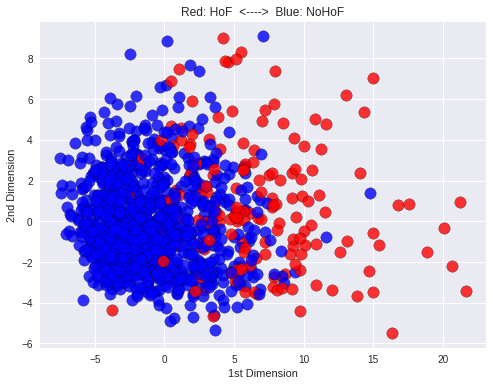

In [36]:
#plot_2d_data(X_pca2, y_temp.to_numpy())

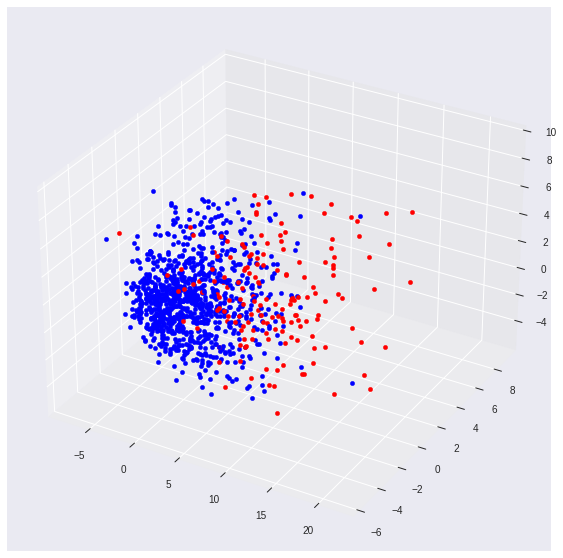

In [37]:
#plot_3d_data(X_pca3, y_temp.to_numpy(), (10,10))

In [38]:
#kpca = KernelPCA(n_components=3, kernel='poly')
#X_kpca3 = kpca.fit_transform(X_scaled)

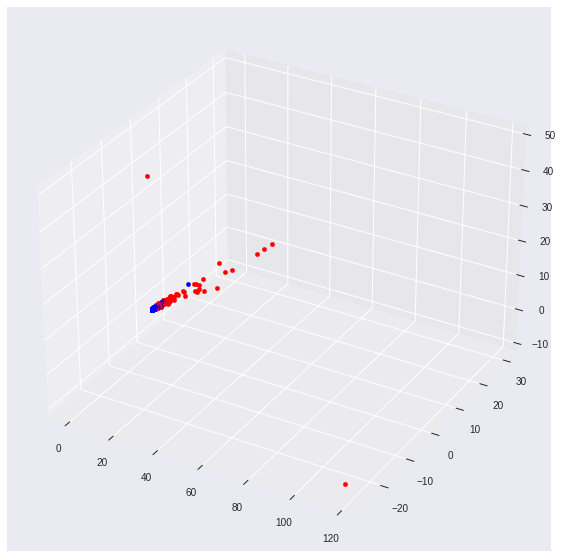

In [39]:
#plot_3d_data(X_kpca3, y_temp.to_numpy(), (10,10))

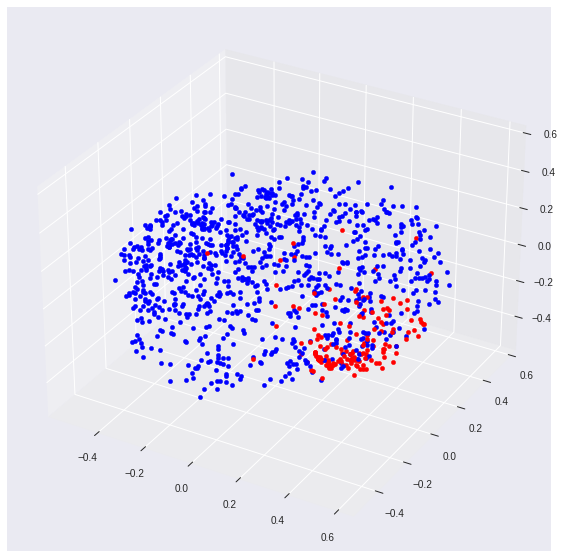

In [40]:
#kpca = KernelPCA(n_components=3, kernel='rbf')
#X_kpca3 = kpca.fit_transform(X_scaled)
#plot_3d_data(X_kpca3, y_temp.to_numpy(), (10,10))

In [36]:
from sklearn.manifold import TSNE

In [39]:
X_tsne3 = TSNE(n_components=3).fit_transform(X_scaled)

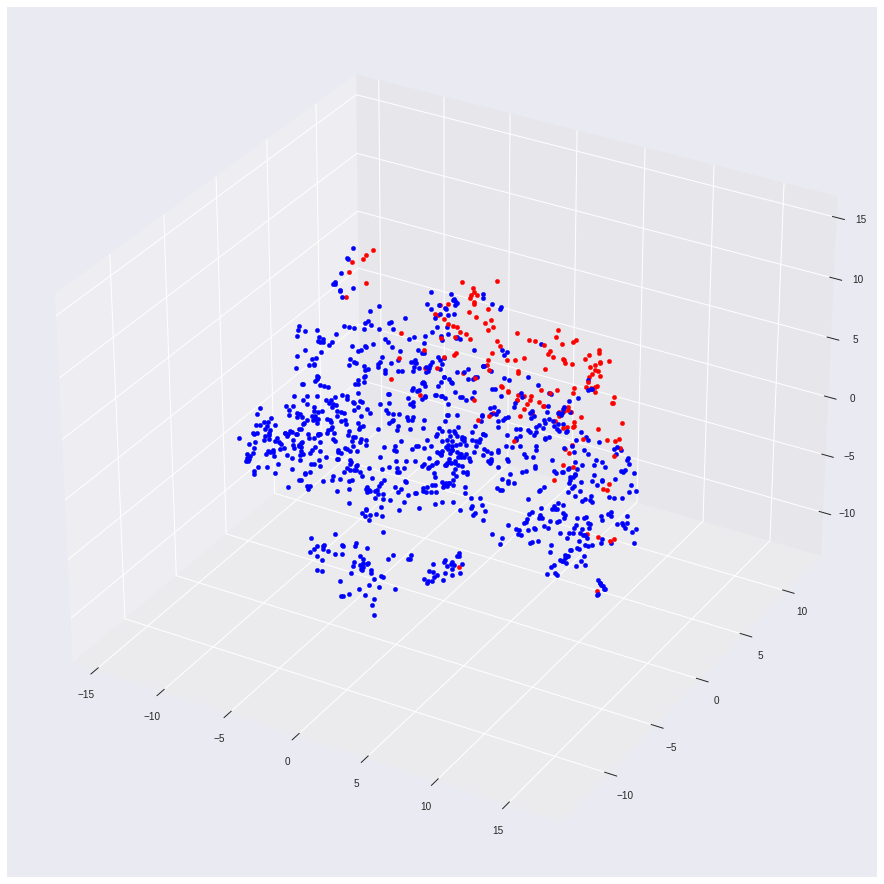

In [40]:
plot_3d_data(X_tsne3, y_temp.to_numpy())

In [42]:
X = select_features(inactive_plus_10_season, features+['SB_bt']+target)
X

retirement_age  debut_decade  retirament_decade  total_seasons  \
0                 37          1970               1980             17   
1                 42          1950               1970             23   
2                 36          1980               2000             13   
3                 39          1950               1970             18   
4                 37          1940               1950             14   
...              ...           ...                ...            ...   
1131              34          1870               1880             15   
1132              32          1900               1910             13   
1133              34          1970               1980             13   
1134              38          1980               2000             16   
1135              42          1880               1900             19   

      play_in_mayors  play_in_negro_league  two_way_player  2B_bt  3B_bt  \
0                  1                     0               0  183.0   13.0   
1                  1                     0               0  624.0   98.0   
2                  1                     0               0  189.0   53.0   
3                  1                     0               0  394.0   92.0   
4                  1                     0               0  188.0   49.0   
...              ...                   ...             ...    ...    ...   
1131               1                     0               0  218.0   89.0   
1132               1                     0               0  275.0  105.0   
1133               1                     0               0  245.0   26.0   
1134               1                     0               0  397.0   23.0   
1135               1                     0               0  222.0   76.0   

        AB_bt  BA_bt   BB_bt    G_bt  HR_bt    H_bt  OBP_bt  OPS+_bt  OPS_bt  \
0      4123.0  0.245   461.0  1370.0   90.0  1010.0   0.320     93.0   0.681   
1     12364.0  0.305  1402.0  3298.0  755.0  3771.0   0.374    155.0   0.928   
2      3971.0  0.260   500.0  1341.0   47.0  1031.0   0.346     89.0   0.715   
3     10230.0  0.262   736.0  2599.0   83.0  2677.0   0.311     82.0   0.653   
4      4019.0  0.269   414.0  1281.0   37.0  1082.0   0.340     90.0   0.708   
...       ...    ...     ...     ...    ...     ...     ...      ...     ...   
1131   4005.0  0.273   198.0   963.0   14.0  1095.0   0.309    119.0   0.692   
1132   5304.0  0.295   242.0  1456.0   58.0  1566.0   0.331    121.0   0.750   
1133   5144.0  0.287   533.0  1453.0  207.0  1477.0   0.353    127.0   0.818   
1134   7573.0  0.265   945.0  2158.0  253.0  2004.0   0.346    104.0   0.769   
1135   4546.0  0.269   390.0  1280.0   26.0  1225.0   0.339     96.0   0.708   

        PA_bt  RAA_bt  RAR_bt  RBI_bt    R_bt  Rbaser_bt  Rbat_bt  Rdp_bt  \
0      4699.0   -45.0   117.0   513.0   397.0      -13.0    -48.0    -6.0   
1     13941.0   866.0  1363.0  2297.0  2174.0       44.0    877.0   -12.0   
2      4614.0   -32.0   129.0   422.0   551.0        7.0    -65.0     2.0   
3     11231.0   215.0   565.0   791.0  1335.0       92.0   -198.0    18.0   
4      4534.0    -5.0   164.0   303.0   591.0       10.0    -40.0     8.0   
...       ...     ...     ...     ...     ...        ...      ...     ...   
1131   4213.0    70.0   207.0   502.0   743.0        1.0     81.0     0.0   
1132   5744.0   146.0   323.0   799.0   695.0       -8.0    124.0     0.0   
1133   5737.0    56.0   252.0   792.0   681.0      -14.0    172.0   -13.0   
1134   8649.0   -61.0   217.0  1110.0   986.0      -30.0     49.0   -17.0   
1135   5078.0   152.0   321.0   625.0   617.0      -10.0    -42.0     0.0   

      Rfield_bt  Rpos_bt  Rrep_bt  SLG_bt   TB_bt  WAA_bt  WAR_bt  dWAR_bt  \
0         -57.0     78.0    162.0   0.361  1489.0    -5.0    11.1      2.4   
1          98.0   -141.0    496.0   0.555  6856.0    92.8   143.0     -4.6   
2           1.0     21.0    161.0   0.369  1467.0    -3.5    11.9      2.4   
3         149.0    154.0    35

In [43]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

In [44]:
from Models.functions.stats_bar import stats_bar_plot

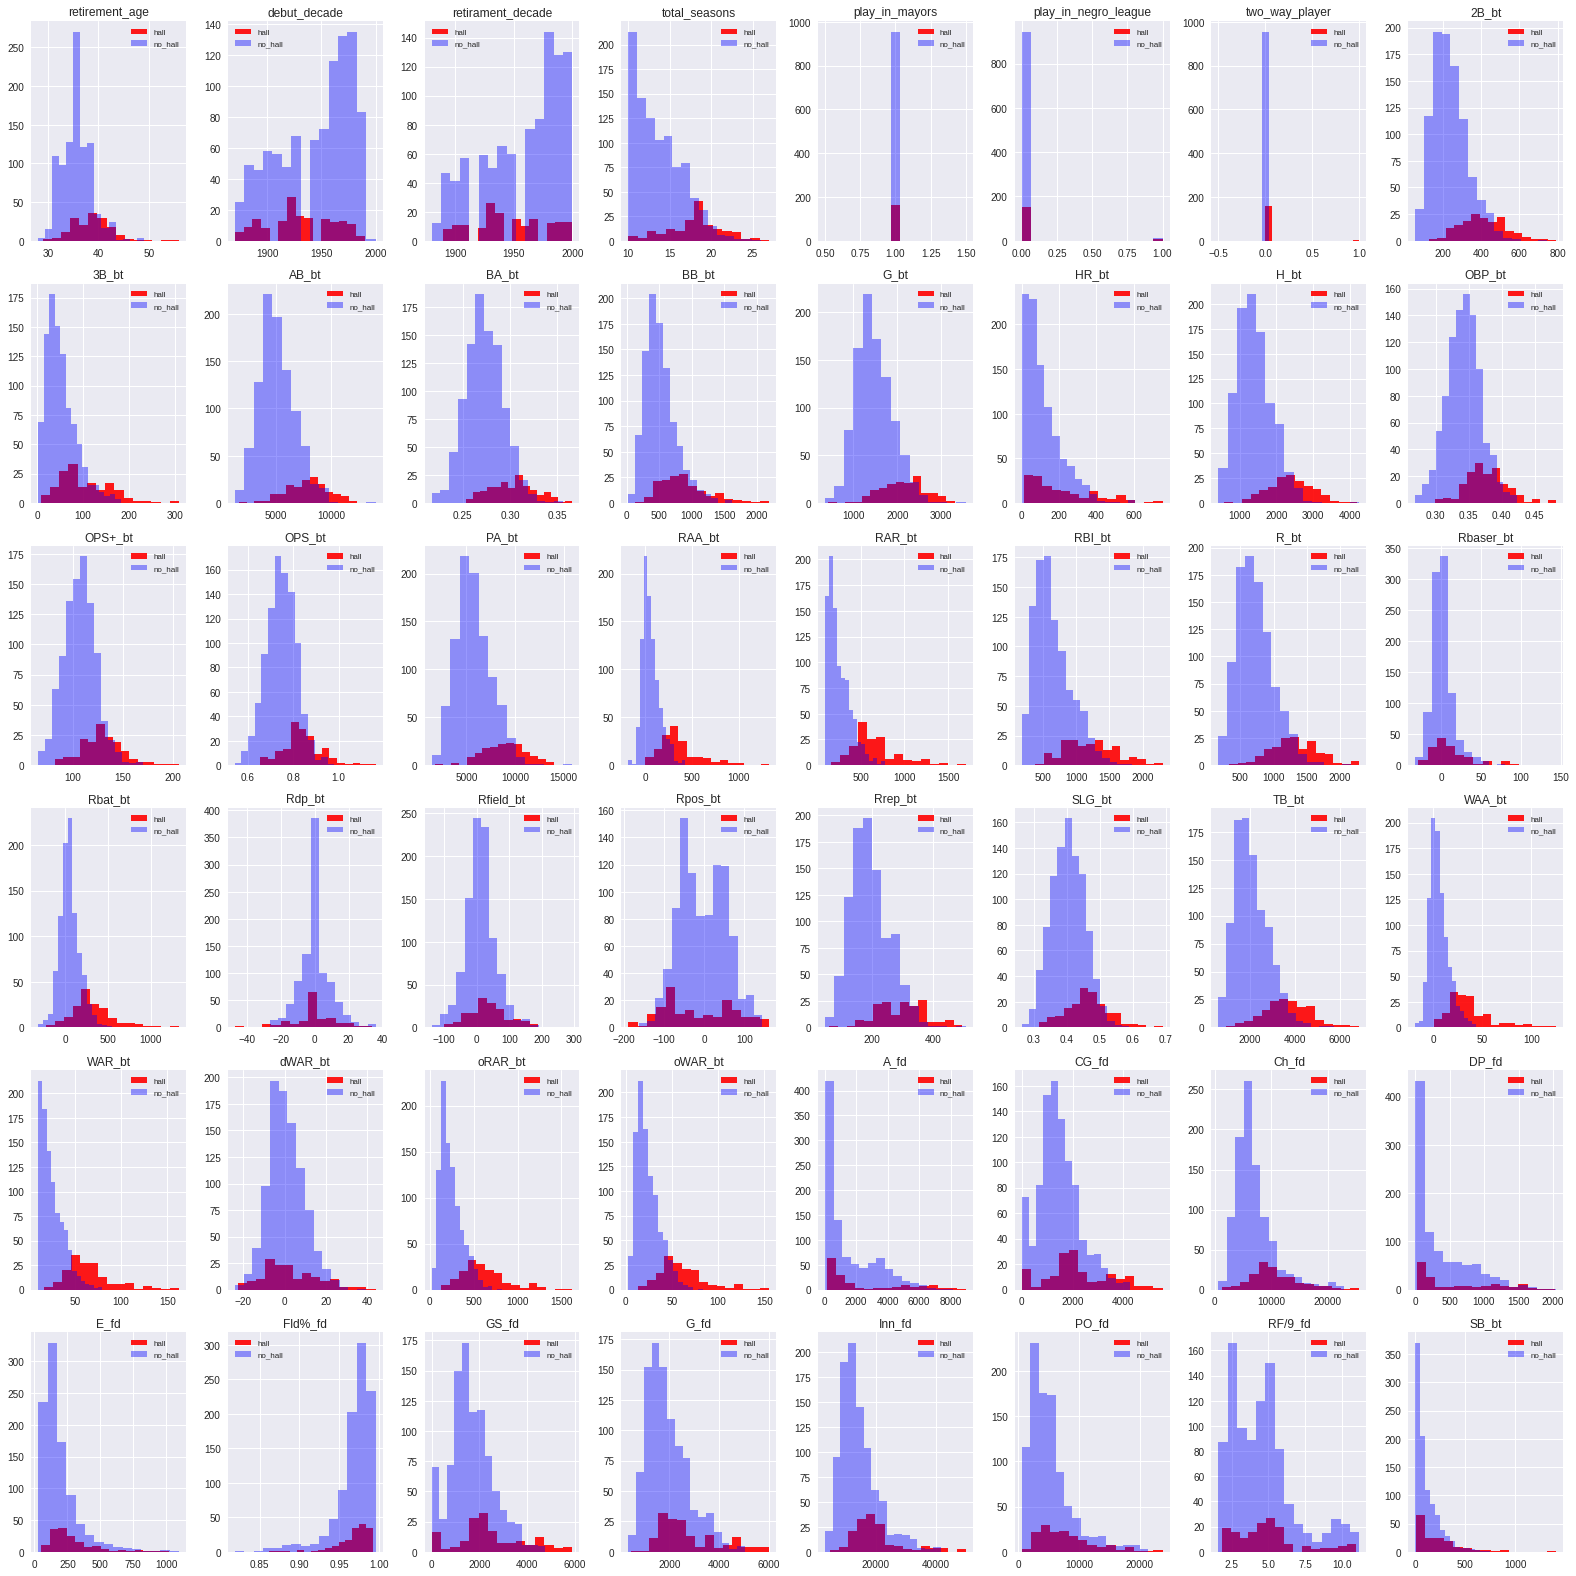

In [45]:
stats_bar_plot(hall, no_hall, features[:-1]+['SB_bt'], 6,8,(22,22))

Las estadisticas defensivas no muestran practicamente diferencia en ambos grupos

In [46]:
of_features = ['retirement_age','debut_decade','retirament_decade','total_seasons','two_way_player','2B_bt',
'3B_bt','AB_bt','BA_bt','BB_bt','G_bt','HR_bt','H_bt','OBP_bt','OPS+_bt','OPS_bt','PA_bt','RAA_bt','RAR_bt','RBI_bt',
'R_bt','Rbaser_bt','Rbat_bt','Rdp_bt','Rfield_bt','Rpos_bt','Rrep_bt','SLG_bt','TB_bt','WAA_bt','WAR_bt','dWAR_bt',
'oRAR_bt','oWAR_bt','SB_bt']

Vamos a ver que nos dicen los modelos acerca de los features

In [47]:
from Models.functions.feature_imp import clasifier_ft_importance_experiments, plot_feature_importance

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
#X_temp = select_features(inactive_plus_10_season, features+['SB_bt'])
#y_temp = select_features(inactive_plus_10_season, target)
#
#X_temp.reset_index(drop=True,inplace=True)
#y_temp.reset_index(drop=True,inplace=True)

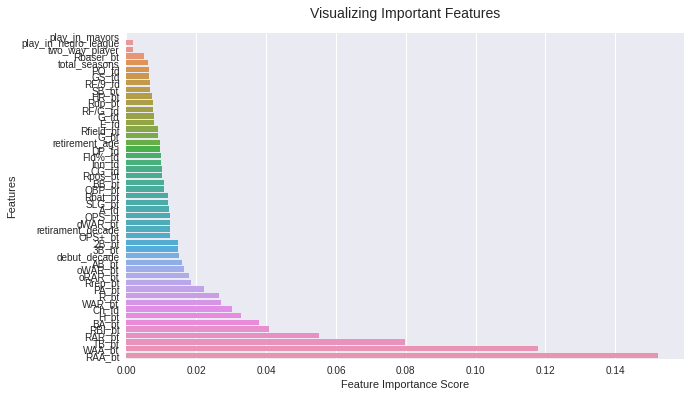

In [49]:
#rf5_clf = RandomForestClassifier(n_estimators = 5, random_state = 1)
#plot_feature_importance(clasifier_ft_importance_experiments(rf5_clf,X_temp,y_temp).sort_values())

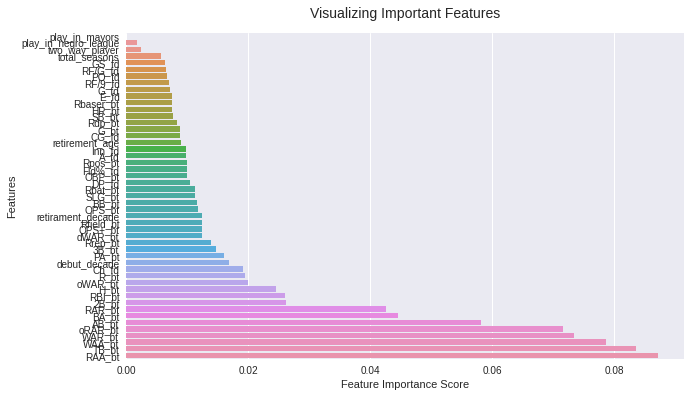

In [50]:
#rf10_clf = RandomForestClassifier(n_estimators = 10, random_state = 1)
#plot_feature_importance(clasifier_ft_importance_experiments(rf10_clf,X_temp,y_temp).sort_values())

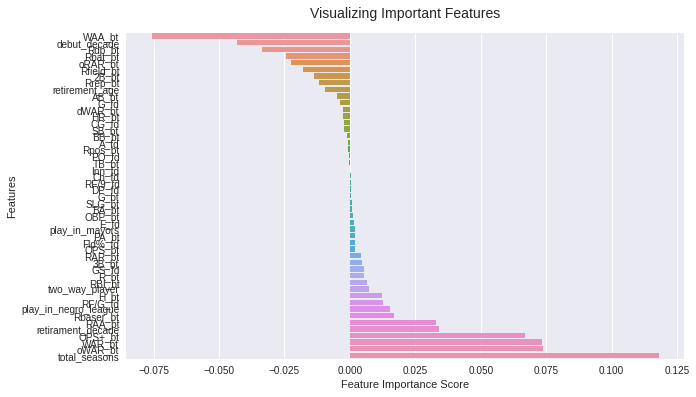

In [51]:
#lr_clf = LogisticRegression(solver='liblinear', max_iter=10000)
#plot_feature_importance(clasifier_ft_importance_experiments(lr_clf,X_temp,y_temp,True).sort_values())

Veamos la correlacion de las variables respecto al Target

In [52]:
df = select_features(inactive_plus_10_season, of_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
#df_corr

HoF                  1.000000
RAR_bt               0.683915
WAR_bt               0.678780
RAA_bt               0.664950
oRAR_bt              0.660616
oWAR_bt              0.657535
WAA_bt               0.656607
R_bt                 0.590234
H_bt                 0.578492
TB_bt                0.576285
RBI_bt               0.561891
Rbat_bt              0.557731
2B_bt                0.534436
PA_bt                0.521044
AB_bt                0.511686
Rrep_bt              0.501105
G_bt                 0.477998
BA_bt                0.455148
3B_bt                0.454836
total_seasons        0.449264
BB_bt                0.444440
OPS+_bt              0.432953
OPS_bt               0.431613
OBP_bt               0.410513
SLG_bt               0.376596
retirement_age       0.344541
HR_bt                0.320050
SB_bt                0.256609
Rbaser_bt            0.222502
Rfield_bt            0.205808
debut_decade         0.150126
retirament_decade    0.107412
two_way_player       0.102823
dWAR_bt   

In [49]:
import seaborn as sns
from matplotlib import rcParams

<AxesSubplot:>

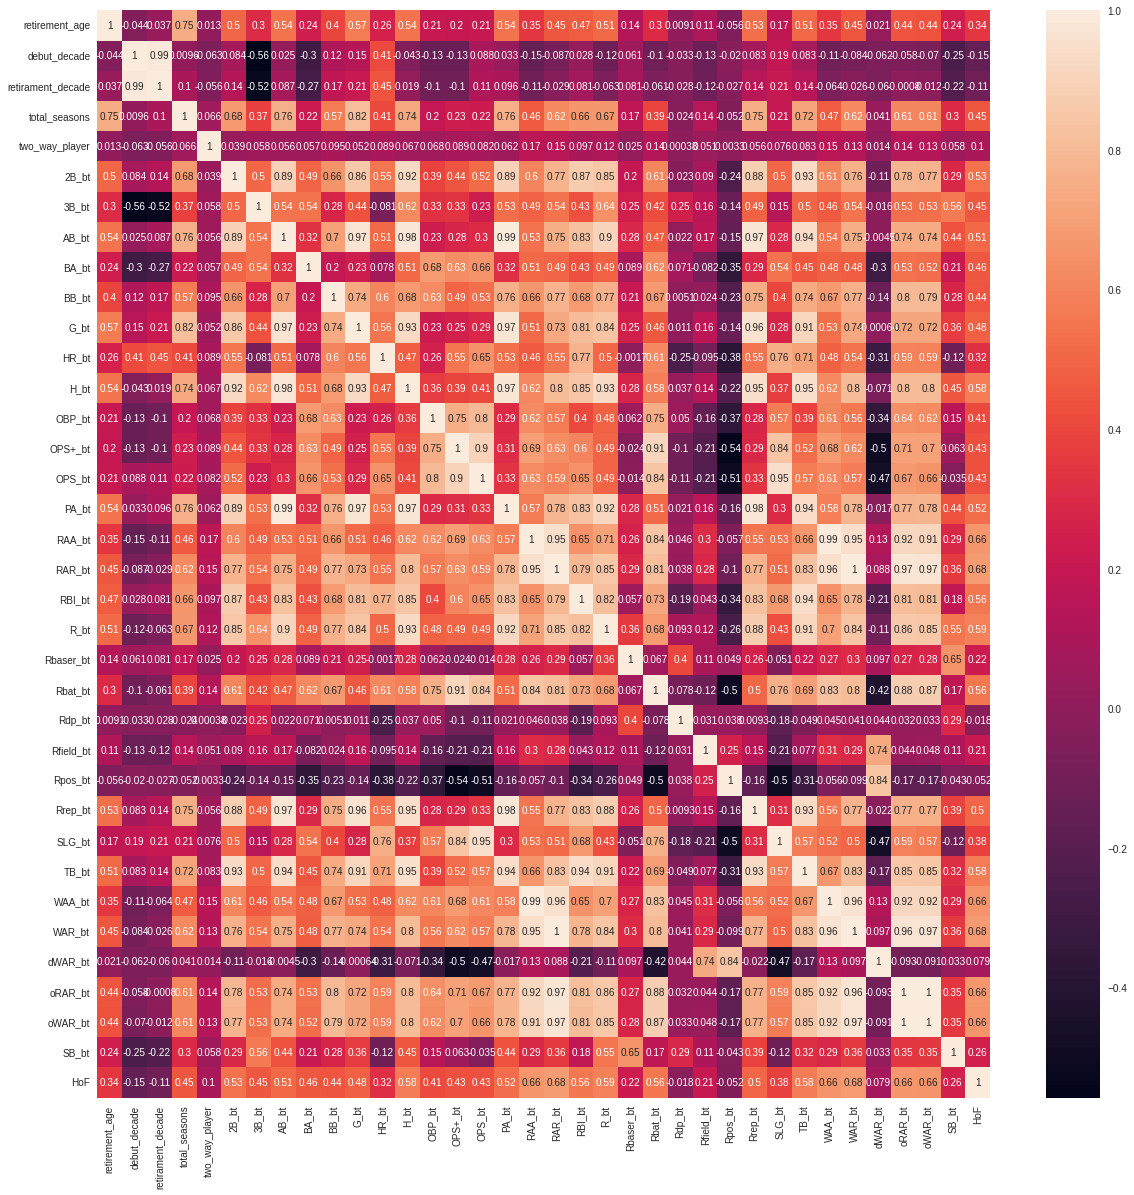

In [53]:
#m_corr = df.corr()
#rcParams['figure.figsize'] = 20,20
#sns.heatmap(m_corr, annot=True)

Vamos a quitarnos aquellos features con alta correlacion, teniendo en cuenta aquellas estadisticas que son sensibles dentro de la eleccion de un jugador a la hora de evaluar su rendimiento

In [50]:
reduced_features = ['retirement_age','total_seasons','WAR_bt', 'SLG_bt', 'OBP_bt', '2B_bt','3B_bt','R_bt', 'Rfield_bt','RBI_bt', 'G_bt','HR_bt','H_bt', 'SB_bt', 'Rbaser_bt', 'Rrep_bt', 'Rbat_bt']

In [55]:
df = select_features(inactive_plus_10_season, reduced_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
#df_corr

HoF               1.000000
WAR_bt            0.678780
R_bt              0.590234
H_bt              0.578492
RBI_bt            0.561891
Rbat_bt           0.557731
2B_bt             0.534436
Rrep_bt           0.501105
G_bt              0.477998
3B_bt             0.454836
total_seasons     0.449264
OBP_bt            0.410513
SLG_bt            0.376596
retirement_age    0.344541
HR_bt             0.320050
SB_bt             0.256609
Rbaser_bt         0.222502
Rfield_bt         0.205808
Name: HoF, dtype: float64

<AxesSubplot:>

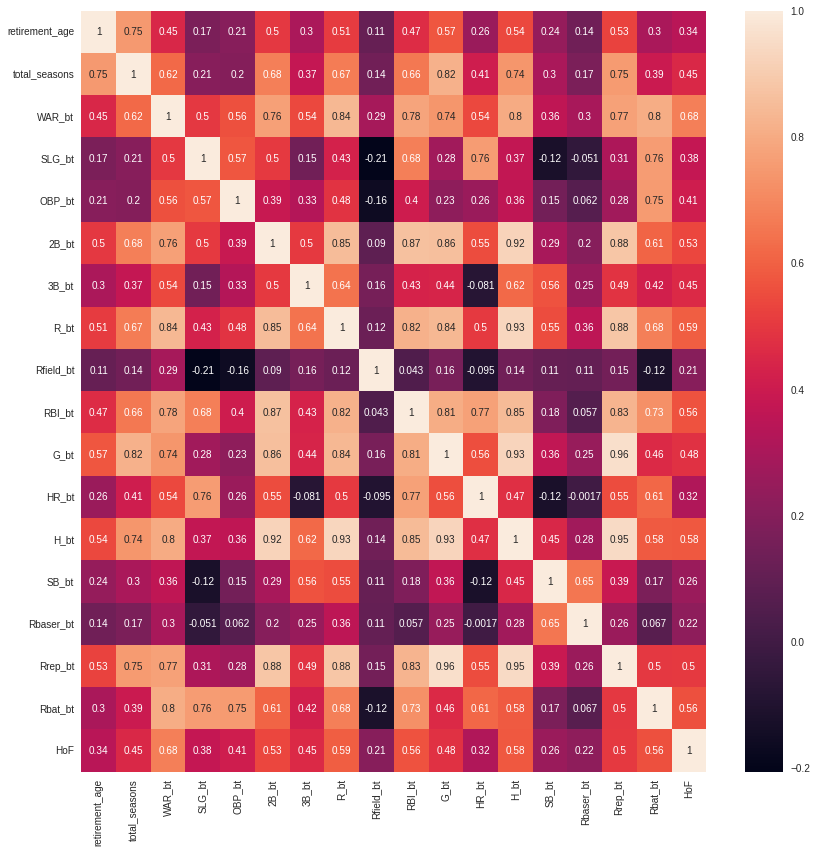

In [56]:
#m_corr = df.corr()
#rcParams['figure.figsize'] = 14,14
#sns.heatmap(m_corr, annot=True)

In [51]:
X_df = select_features(inactive_plus_10_season, reduced_features)
y_df = select_features(inactive_plus_10_season, ['HoF'])

In [52]:
X_df

retirement_age  total_seasons  WAR_bt  SLG_bt  OBP_bt  2B_bt  3B_bt  \
0                 37             17    11.1   0.361   0.320  183.0   13.0   
1                 42             23   143.0   0.555   0.374  624.0   98.0   
2                 36             13    11.9   0.369   0.346  189.0   53.0   
3                 39             18    55.9   0.343   0.311  394.0   92.0   
4                 37             14    15.7   0.368   0.340  188.0   49.0   
...              ...            ...     ...     ...     ...    ...    ...   
1131              34             15    19.6   0.383   0.309  218.0   89.0   
1132              32             13    33.6   0.419   0.331  275.0  105.0   
1133              34             13    25.0   0.466   0.353  245.0   26.0   
1134              38             16    19.4   0.423   0.346  397.0   23.0   
1135              42             19    29.4   0.369   0.339  222.0   76.0   

        R_bt  Rfield_bt  RBI_bt    G_bt  HR_bt    H_bt  SB_bt  Rbaser_bt  \
0      397.0      -57.0   513.0  1370.0   90.0  1010.0    7.0      -13.0   
1     2174.0       98.0  2297.0  3298.0  755.0  3771.0  240.0       44.0   
2      551.0        1.0   422.0  1341.0   47.0  1031.0   81.0        7.0   
3     1335.0      149.0   791.0  2599.0   83.0  2677.0  506.0       92.0   
4      591.0       -3.0   303.0  1281.0   37.0  1082.0   67.0       10.0   
...      ...        ...     ...     ...    ...     ...    ...        ...   
1131   743.0       50.0   502.0   963.0   14.0  1095.0   20.0        1.0   
1132   695.0       -5.0   799.0  1456.0   58.0  1566.0  175.0       -8.0   
1133   681.0       -9.0   792.0  1453.0  207.0  1477.0    8.0      -14.0   
1134   986.0      -70.0  1110.0  2158.0  253.0  2004.0   53.0      -30.0   
1135   617.0      124.0   625.0  1280.0   26.0  1225.0  151.0      -10.0   

      Rrep_bt  Rbat_bt  
0       162.0    -48.0  
1       496.0    877.0  
2       161.0    -65.0  
3       350.0   -198.0  
4       168.0    -40.0  
...       ...      ...  
1131    137.0     81.0  
1132    177.0    124.0  
1133    195.0    172.0  
1134    277.0     49.0  
1135    169.0    -42.0  

[1116 rows x 17 columns]

In [72]:
X_df.reset_index(inplace=True, drop=True)
y_df.reset_index(inplace=True, drop=True)

In [73]:
print(X_df.index)
y_df.index

RangeIndex(start=0, stop=1116, step=1)


RangeIndex(start=0, stop=1116, step=1)

In [74]:
X_df.describe()

retirement_age  total_seasons       WAR_bt       SLG_bt       OBP_bt  \
count     1116.000000    1116.000000  1116.000000  1116.000000  1116.000000   
mean        36.015233      14.488351    31.056541     0.413134     0.347649   
std          3.216931       3.239450    21.220771     0.056758     0.029055   
min         28.000000      10.000000    10.000000     0.264000     0.269000   
25%         34.000000      12.000000    15.900000     0.373000     0.328000   
50%         36.000000      14.000000    24.850000     0.411000     0.346000   
75%         38.000000      17.000000    39.600000     0.448000     0.365000   
max         56.000000      27.000000   162.700000     0.690000     0.482000   

             2B_bt        3B_bt         R_bt    Rfield_bt       RBI_bt  \
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000   
mean    262.651434    58.883513   807.698925    16.142473   733.517025   
std     113.722546    41.587714   353.218649    50.758042   351.974783   
min      56.000000     2.000000   169.000000  -139.000000   187.000000   
25%     181.000000    29.750000   552.000000   -14.000000   468.500000   
50%     241.000000    49.000000   735.000000    13.000000   647.500000   
75%     321.000000    76.000000   987.750000    40.000000   934.500000   
max     792.000000   309.000000  2295.000000   294.000000  2297.000000   

              G_bt        HR_bt         H_bt        SB_bt    Rbaser_bt  \
count  1116.000000  1116.000000  1116.000000  1116.000000  1116.000000   
mean   1567.517921   127.485663  1541.560932   133.850358     3.050179   
std     483.327481   115.648000   597.598292   144.843605    17.509234   
min     354.000000     0.000000   423.000000     1.000000   -33.000000   
25%    1221.000000    43.000000  1117.750000    37.000000    -7.000000   
50%    1482.000000    93.000000  1442.500000    80.000000    -1.000000   
75%    1853.250000   173.000000  1886.250000   183.250000     8.250000   
max    3562.000000   755.000000  4256.000000  1406.000000   144.000000   

           Rrep_bt      Rbat_bt  
count  1116.000000  1116.000000  
mean    208.284050    91.516129  
std      74.851728   171.045602  
min      46.000000  -317.000000  
25%     155.000000   -12.250000  
50%     195.000000    61.000000  
75%     255.000000   162.000000  
max     507.000000  1333.000000

In [75]:
print(X_df.shape)
y_df.shape

(1116, 17)


(1116, 1)

In [76]:
y_df.value_counts()

HoF
0      954
1      162
dtype: int64

Vemos el porcentaje de pertenencia a la clase minoritaria

In [77]:
def percent(a,b):
    print(round((a/(a+b)),3)*100)
percent(162,954)

14.499999999999998


El corpus es debalanceado y no es necesaria la separacion por grupos asi que utilizaremos StratifiedKFold para el cross validation

In [78]:
from sklearn.model_selection import train_test_split

X, X_tester, y, y_tester = train_test_split(X_df, y_df,test_size=0.2, shuffle=True, random_state=17)

In [79]:
X_tester.reset_index(inplace=True, drop=True)
y_tester.reset_index(inplace=True, drop=True)

In [80]:
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

In [59]:
print(X.shape)
y.shape

(892, 17)


(892, 1)

In [60]:
print(y.value_counts())
y_tester.value_counts()

HoF
0      765
1      127
dtype: int64


HoF
0      189
1       35
dtype: int64

In [61]:
percent(127,765)
percent(35,189)

14.2
15.6


Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [62]:
from Models.functions.metrics import show_baseline_score
show_baseline_score(baseline=np.zeros_like(np.ravel(y)), y_val=np.ravel(y))

Accuracy: 0.8576
AUC: 0.5000


Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus sin procesamiento previo

In [63]:
from Models.functions.models_performance_comparer import performance_comparer_plus

In [64]:
from Models.functions.parameters_selection import model_parameter_optimization

In [65]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [198]:
dt_params = {'criterion':['gini','entropy'], 'max_depth':[2,3,4,5]}
#dt_clf = model_parameter_optimization(DecisionTreeClassifier(), dt_params, X, y, refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 3} : 0.9241115384615384 roc_auc


In [66]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [73]:
lr_params = {'penalty':['l1','l2'], 'tol':[1e-4, 1e-3,1e-2], 'C':np.arange(1,5,0.5), 'max_iter':np.arange(100, 10000, 1000)}
#lr_clf = model_parameter_optimization(LogisticRegression(solver='liblinear'), lr_params, X, np.ravel(y), refit=True)


Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 2.0, 'max_iter': 100, 'penalty': 'l1', 'tol': 0.001} : 0.9721358974358975 roc_auc


In [67]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', max_iter=100, C=2)

In [75]:
rf_params = {'criterion':['gini','entropy'], 'n_estimators':[2,3,4,5]}
#rf_clf = model_parameter_optimization(RandomForestClassifier(max_depth=3), rf_params, X, np.ravel(y), refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'n_estimators': 5} : 0.9518448717948718 roc_auc


In [68]:
rf_clf = RandomForestClassifier(max_depth=3, criterion='entropy', n_estimators=5)

In [77]:
knn_params = {'n_neighbors':np.arange(2,50)}
#knn_clf = model_parameter_optimization(KNeighborsClassifier(), knn_params, X, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_neighbors': 34} : 0.9223346153846155 roc_auc


In [69]:
knn_clf = KNeighborsClassifier(n_neighbors=34)

In [98]:
svmp_params = {'degree':np.arange(2,9), 'C':np.arange(1,4,0.2)}
#svmp_clf = model_parameter_optimization(SVC(kernel='poly',probability=True), svmp_params, X, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 3.7999999999999994, 'degree': 4} : 0.9590871794871795 roc_auc


In [101]:
svmp_params = {'C':np.arange(1,10,0.2)}
#svmp_clf = model_parameter_optimization(SVC(kernel='poly',probability=True, degree=4), svmp_params, X, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 3.7999999999999994} : 0.9590871794871795 roc_auc


In [103]:
svmp_clf = SVC(kernel='poly',probability=True, C=3.8, degree=4)

In [102]:
svmr_params = {'C':np.arange(4,10,0.2)}
#svmr_clf = model_parameter_optimization(SVC(kernel='rbf',probability=True), svmr_params, X, np.ravel(y),refit=True)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 9.800000000000004} : 0.9469205128205129 roc_auc


In [104]:
svmr_clf = SVC(kernel='rbf',probability=True, C=9.8)

In [105]:
models  = [dt_clf, lr_clf, rf_clf, knn_clf, svmp_clf, svmr_clf]
models_labels = ['dt_1', 'lr_1', 'rf_1','knn_1','svmp_1', 'svmr_1']

Model : dt_1


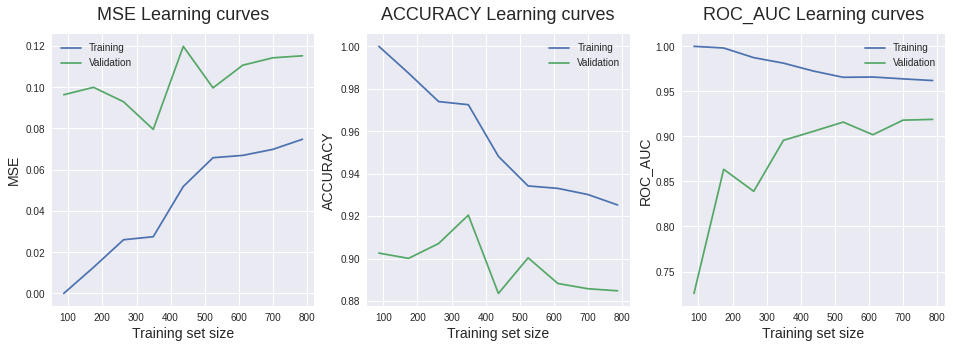

mACC:0.891
mAUC:0.912
<----------------------------------->

Model : lr_1


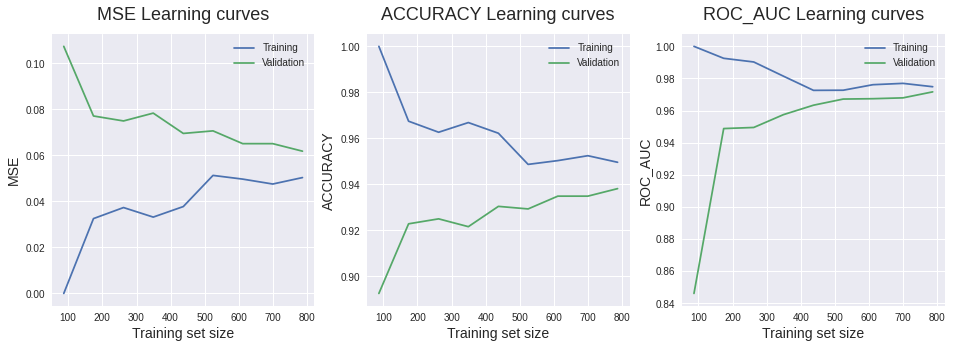

mACC:0.933
mAUC:0.967
<----------------------------------->

Model : rf_1


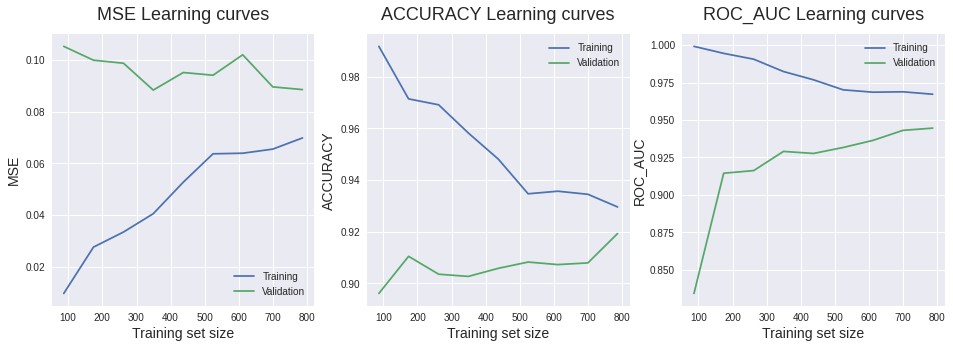

mACC:0.908
mAUC:0.937
<----------------------------------->

Model : knn_1


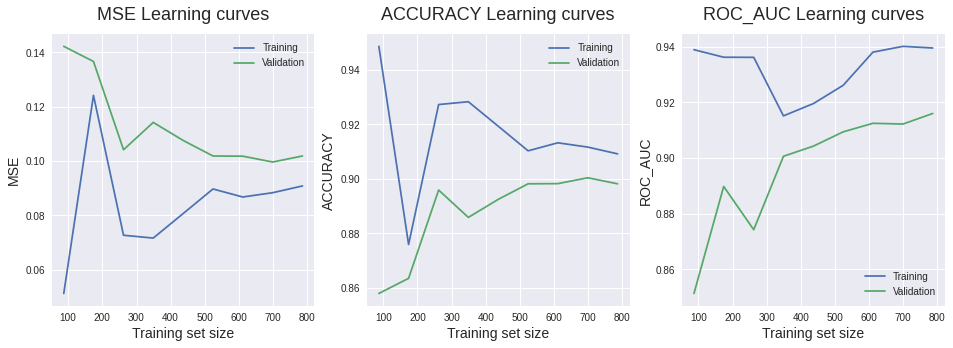

mACC:0.899
mAUC:0.911
<----------------------------------->

Model : svmp_1


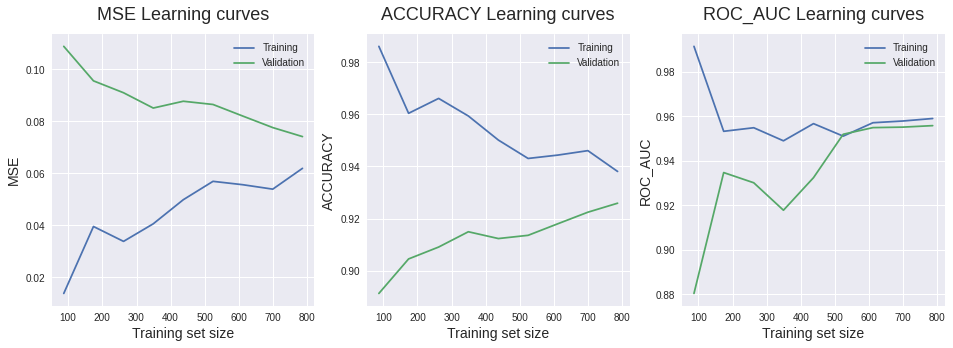

mACC:0.918
mAUC:0.954
<----------------------------------->

Model : svmr_1


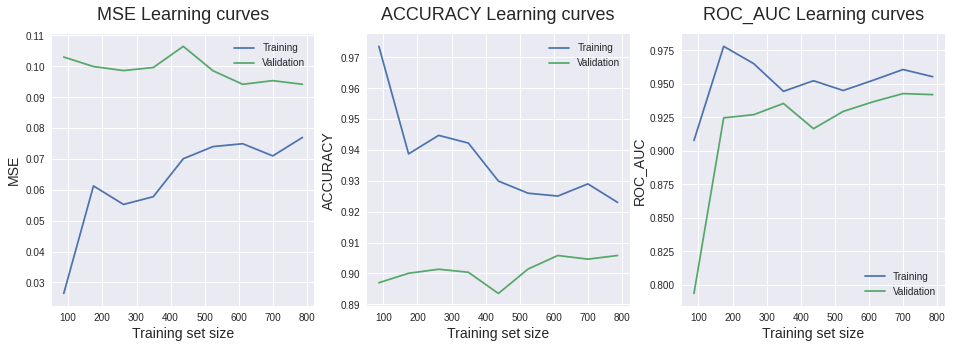

mACC:0.904
mAUC:0.936
<----------------------------------->



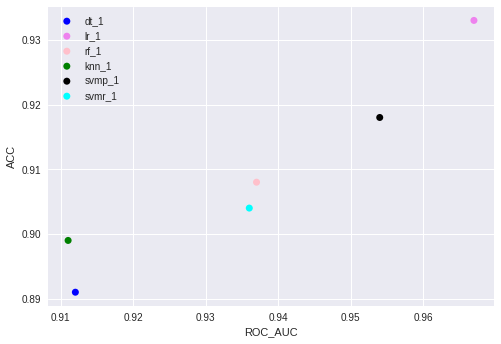

In [106]:
performance_comparer_plus(X, y, models, models_labels)

Vamos a probar con los algoritmos de seleccion de features 

In [61]:
from sklearn.feature_selection import RFE, RFECV

def feature_selection_RFE(clf,X,y,n_features=5):
    rfe = RFE(estimator=clf, n_features_to_select=n_features)
    rfe.fit(X, y)
    for i in range(X.shape[1]):
        if rfe.support_[i]:
    	    print(f'Feature: {X.columns[i]}, Rank: {rfe.ranking_[i]}')

In [62]:
feature_selection_RFE(DecisionTreeClassifier(max_depth=3),X, np.ravel(y), 10)

Feature: retirement_age, Rank: 1
Feature: debut_decade, Rank: 1
Feature: AB_bt, Rank: 1
Feature: BA_bt, Rank: 1
Feature: G_bt, Rank: 1
Feature: RAA_bt, Rank: 1
Feature: RAR_bt, Rank: 1
Feature: R_bt, Rank: 1
Feature: WAA_bt, Rank: 1
Feature: WAR_bt, Rank: 1


In [84]:
from numpy import mean
def automatic_feature_selection(estimators, X, y, n_repetition):
    features_selected  = {}
    count = 0
    for est in estimators:
        rfecv = RFECV(estimator=est)
        for r in range(n_repetition):
            count+=1
            rfecv.fit(X, np.ravel(y))
            for i in range(X.shape[1]):
                if rfecv.support_[i]:
                    feat = X.columns[i]
                    rank = rfecv.ranking_[i]
                    if features_selected.get(feat) == None:
                        features_selected[feat] = [1,rank]
                    else:
                        features_selected[feat][0]+=1
                        features_selected[feat][1]+=rank
    s_features = []
    for feat in features_selected.keys():
        n_selection = features_selected[feat][0]
        m_rank = features_selected[feat][1]/n_selection
        m_selection = (features_selected[feat][0]/count)*100
        s_features.append((feat,m_selection,m_rank))
    s_features.sort(key=lambda x: x[1], reverse=True)
    print(f"Total selections:{count}")
    return s_features
        

In [73]:
#X_r = select_features(X, reduced_features)
#X_r.reset_index(drop=True, inplace=True)

In [89]:
rcParams['figure.figsize'] = 8,6

Vamos a standarizar los datos

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
sc = StandardScaler()
X_st = sc.fit_transform(X)

Vamos a ver que representacion queda de la reduccion de dimensiones

In [ ]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_st)
plot_3d_data(X_pca3, y.to_numpy())

In [ ]:
X_tsne3 = TSNE(n_components=3).fit_transform(X_st)
plot_3d_data(X_tsne3, y.to_numpy())

In [109]:
models_labels2 =  [l+'_st' for l in models_labels]

DecisionTree Gini depth=4


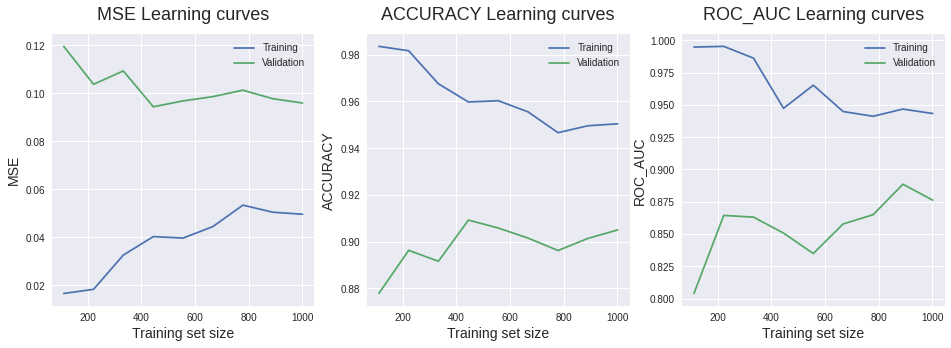

mACC:0.9
mAUC:0.87
<----------------------------------->

DecisionTree Entropy depth=4


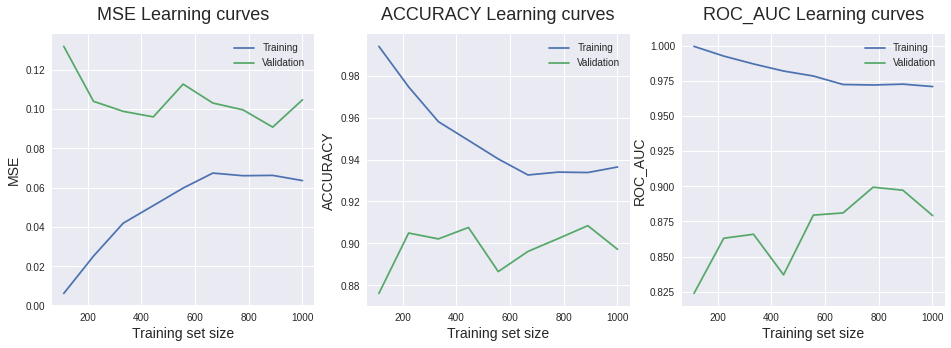

mACC:0.902
mAUC:0.893
<----------------------------------->

DecisionTree Gini depth=3


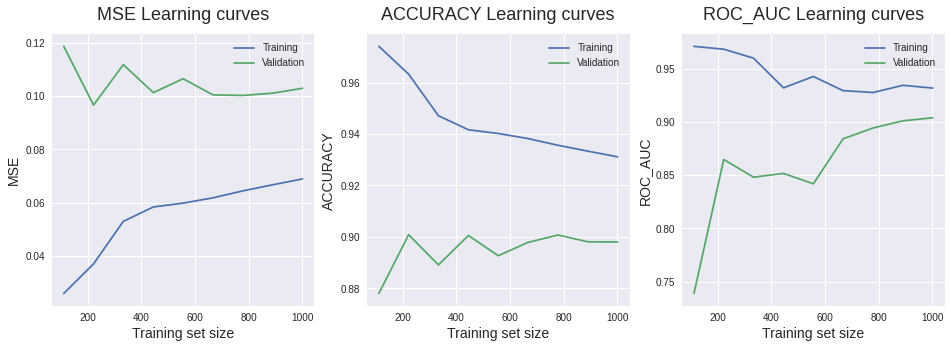

mACC:0.9
mAUC:0.87
<----------------------------------->

DecisionTree Entropy depth=3


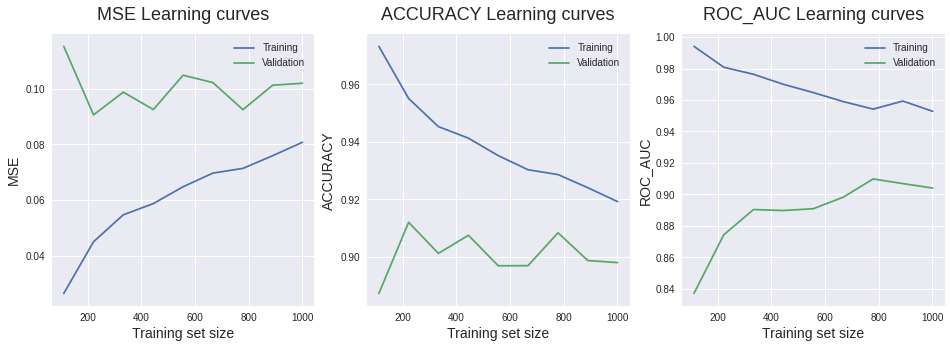

mACC:0.902
mAUC:0.893
<----------------------------------->

SVM kernel=poly


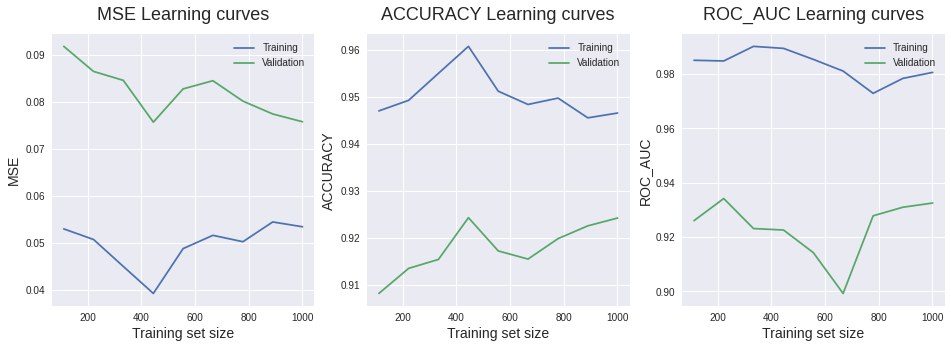

mACC:0.919
mAUC:0.919
<----------------------------------->

SVM kernel=rbf


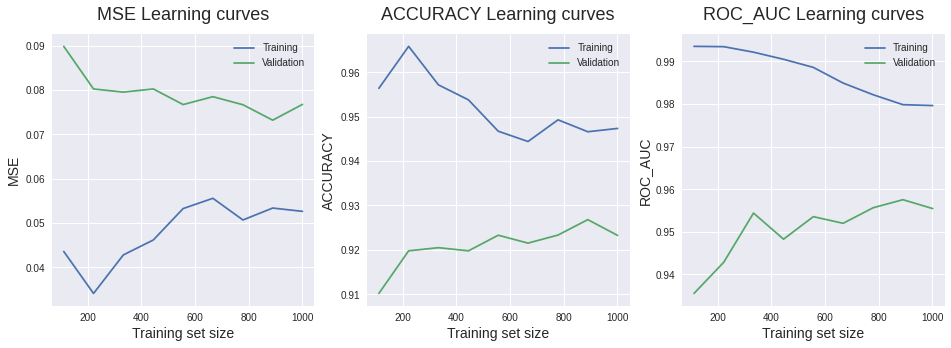

mACC:0.924
mAUC:0.955
<----------------------------------->

Random Forest estimators=10


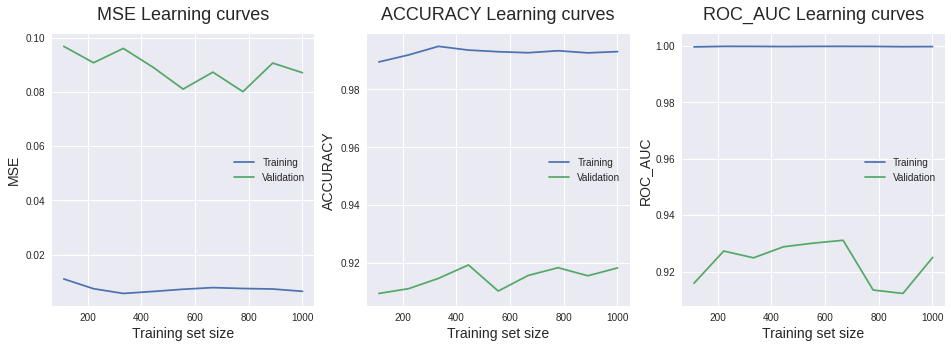

mACC:0.916
mAUC:0.919
<----------------------------------->

Random Forest estimators=5


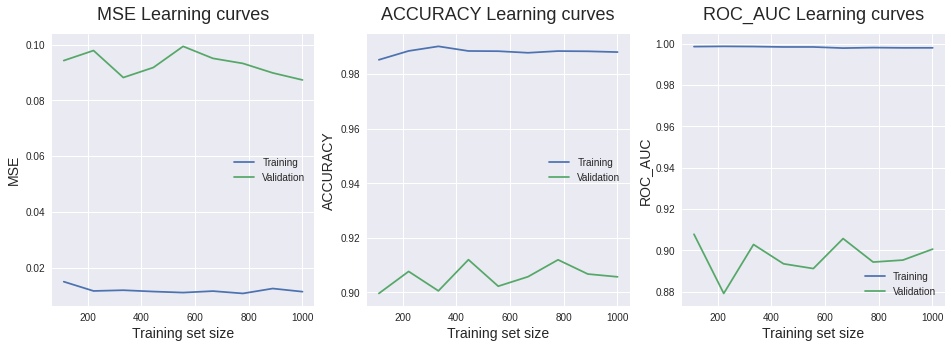

mACC:0.908
mAUC:0.898
<----------------------------------->

Naive Bayes


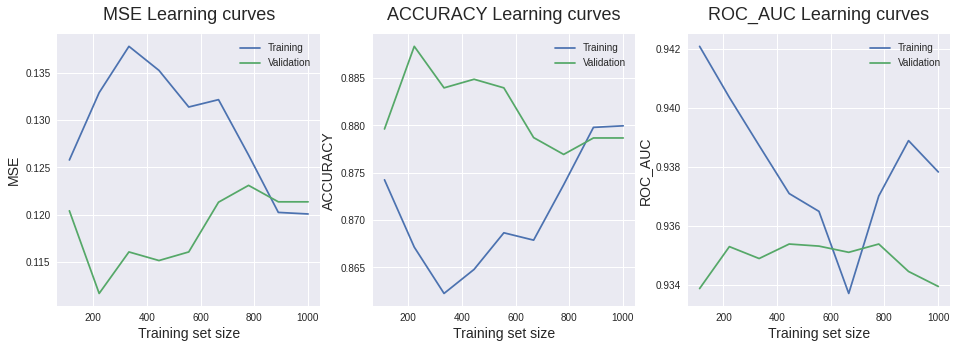

mACC:0.878
mAUC:0.935
<----------------------------------->

3NN


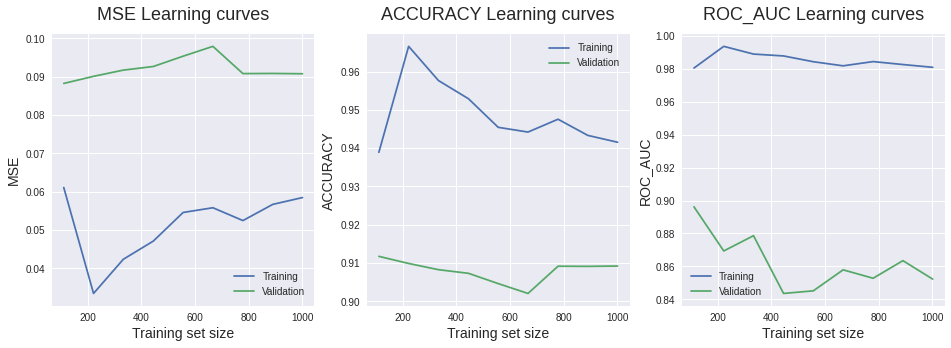

mACC:0.907
mAUC:0.858
<----------------------------------->

5NN


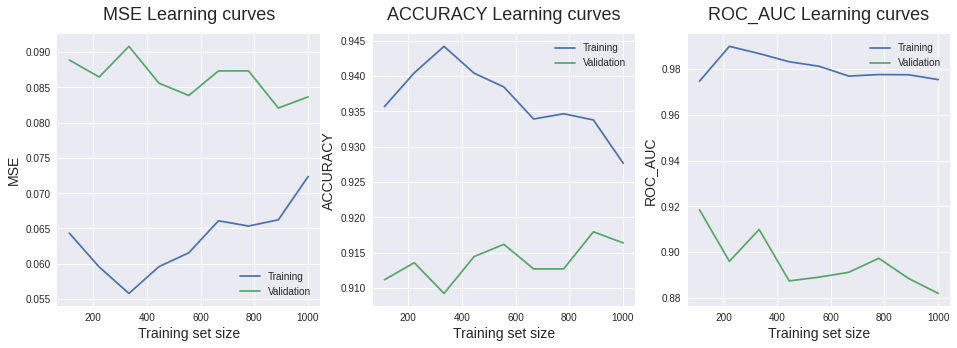

mACC:0.914
mAUC:0.892
<----------------------------------->

10NN


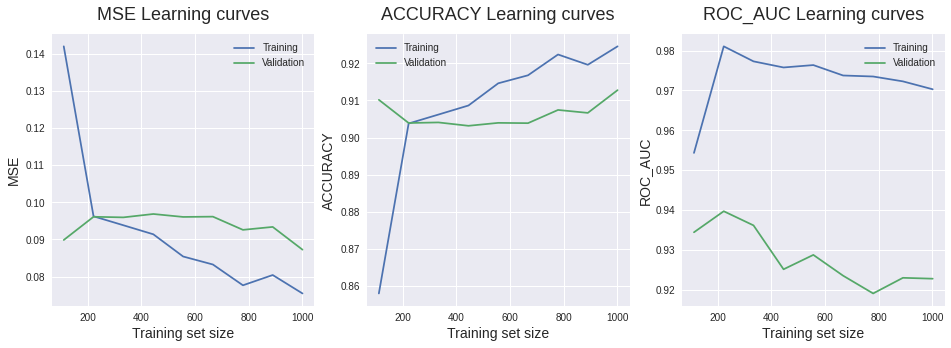

mACC:0.906
mAUC:0.922
<----------------------------------->

LogisticRegression


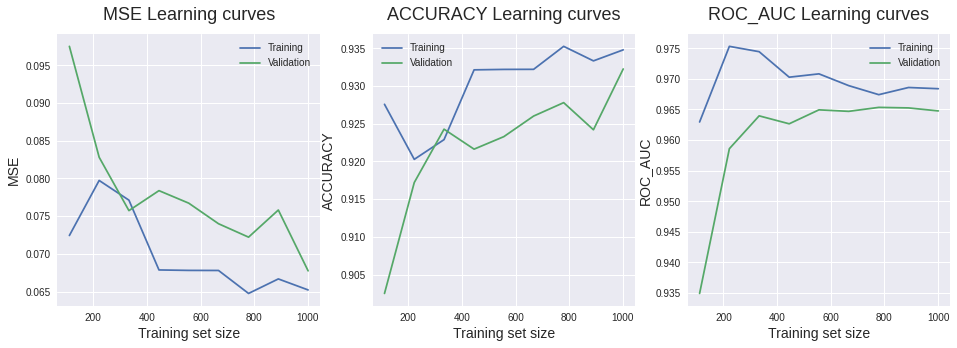

mACC:0.926
mAUC:0.965
<----------------------------------->



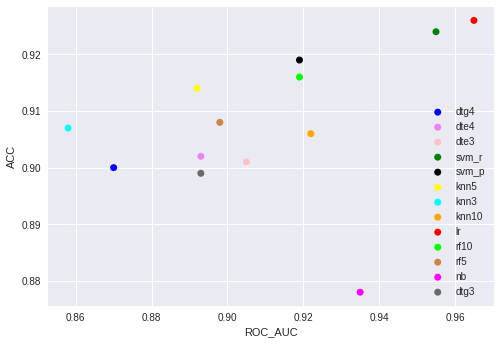

In [ ]:
performance_comparer_plus(X_t, y, models, models_labels2)

Vamos a centrarnos en los modelos de mejor comportamiento

In [81]:
#print('DecisionTree Gini depth=4')
dtg4_clf = DecisionTreeClassifier(criterion='gini', max_depth=4)

##print('DecisionTree Entropy depth=4')
dte4_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

#print('DecisionTree Gini depth=3')
dtg3_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)  

#print('DecisionTree Entropy depth=3')
dte3_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)  

#print('SVM kernel=poly')
svmp_clf = SVC(probability=True, kernel='poly')

#print('SVM kernel=rbf')
svmr_clf = SVC(probability=True, kernel='rbf')

#print('LogisticRegression')
lr_clf = LogisticRegression(max_iter=10000, solver="liblinear")
models  = [dte4_clf, dte4_clf, dte3_clf, dtg3_clf, svmr_clf, svmp_clf, lr_clf]
models_label = ['dtg4','dte4', 'dte3', 'dtg3','svm_r','svm_p','lr']

Vamos a utilizar las tecnicas de reduccion de dimensiones 

In [91]:
from Models.functions.data_set_plot import plot_2d_data, plot_3d_data

from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
X_pca3_r = pca3.fit_transform(X_t)
print('explained variance ratio (for components): %s'%str(pca3.explained_variance_ratio_))

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='poly')

explained variance ratio (for components): [0.54068931 0.15085277 0.08915837]


In [92]:
from Models.functions.data_set_plot import plot_2d_data, plot_3d_data
rcParams['figure.figsize'] = 8,6

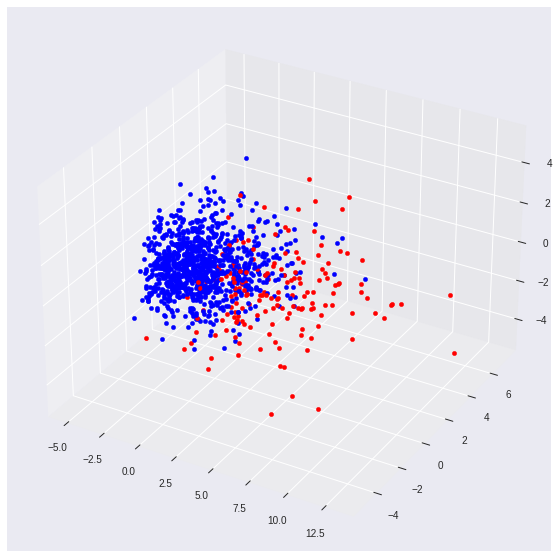

In [93]:
plot_3d_data(X_pca3_r,y.to_numpy(), (10,10))

Model : dtg4


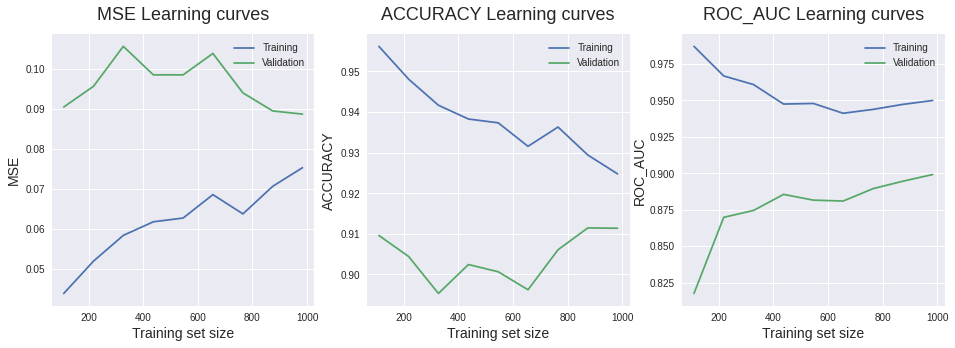

mACC:0.905
mAUC:0.888
<----------------------------------->

Model : dte4


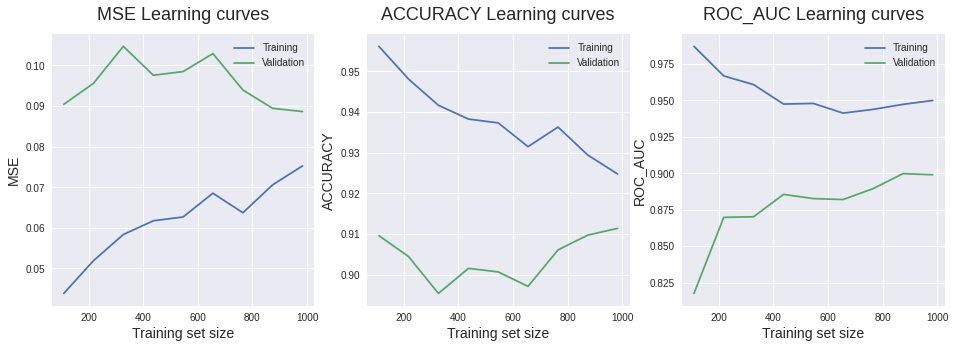

mACC:0.904
mAUC:0.89
<----------------------------------->

Model : dte3


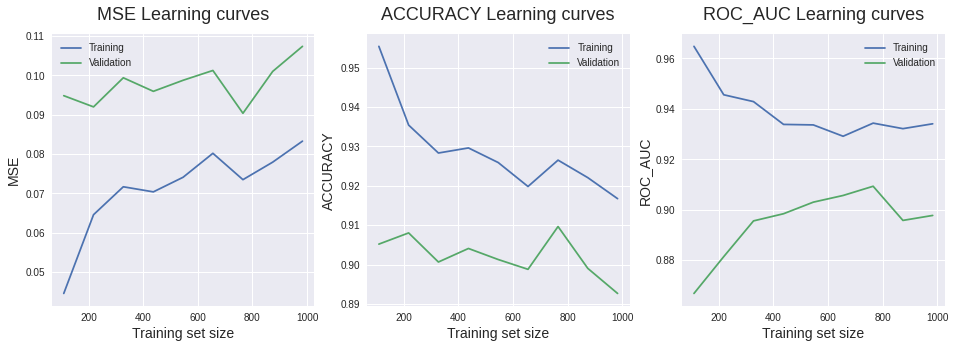

mACC:0.902
mAUC:0.904
<----------------------------------->

Model : dtg3


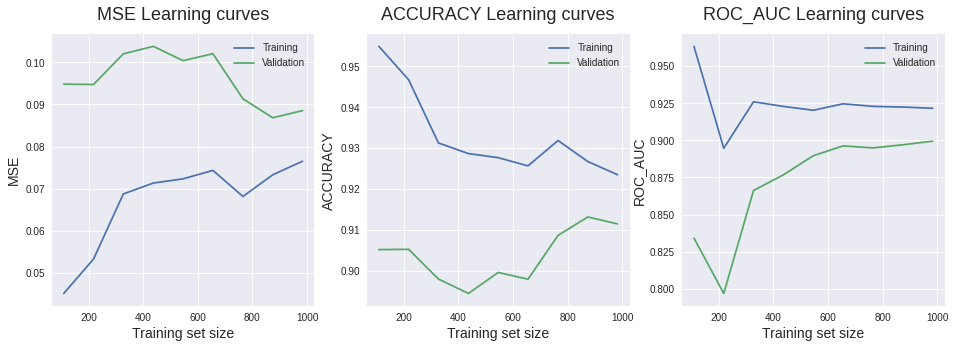

mACC:0.907
mAUC:0.896
<----------------------------------->

Model : svm_r


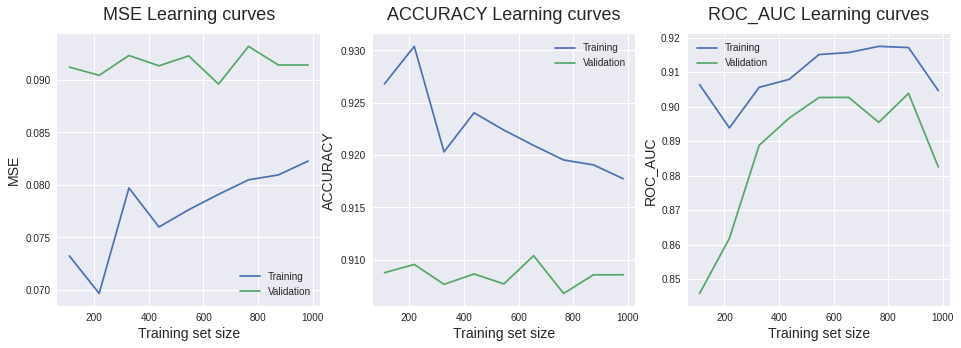

mACC:0.909
mAUC:0.901
<----------------------------------->

Model : svm_p


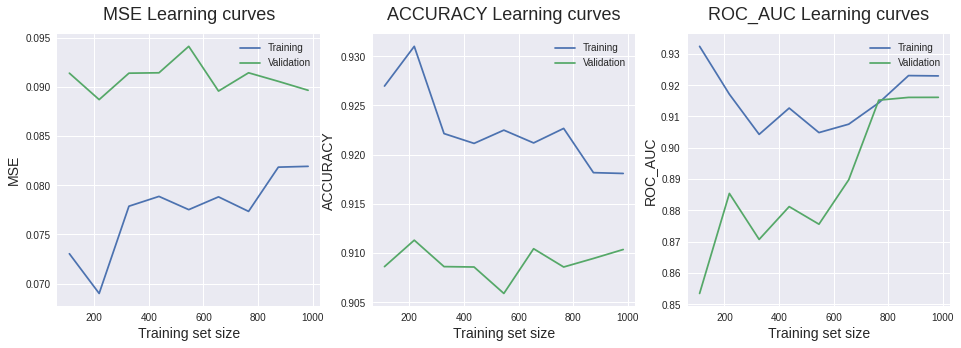

mACC:0.909
mAUC:0.907
<----------------------------------->

Model : lr


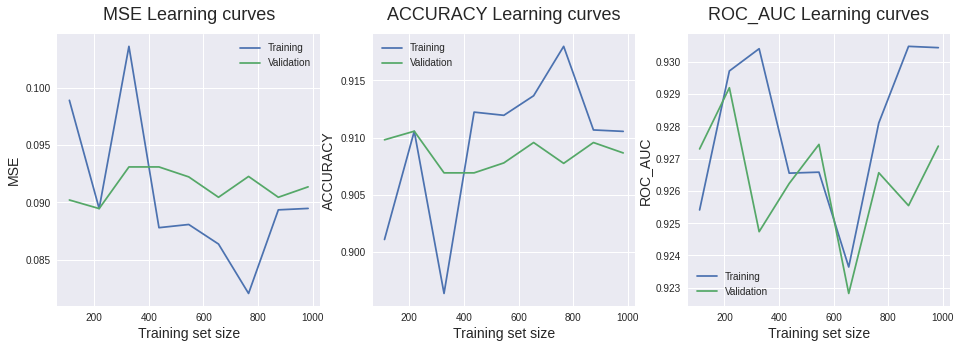

mACC:0.909
mAUC:0.925
<----------------------------------->



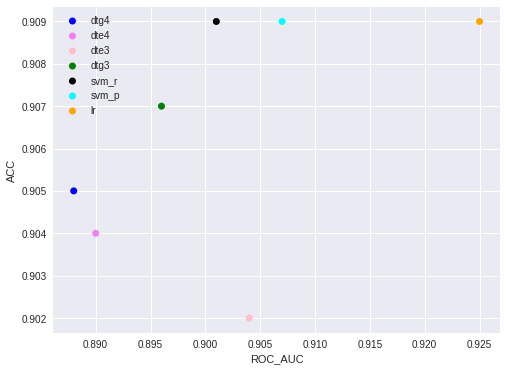

In [88]:
performance_comparer_plus(X_pca3_r, y, models, models_label)

In [94]:
from sklearn.decomposition import KernelPCA

In [95]:
kpca = KernelPCA(n_components=3, kernel='poly')
X_kpca_r = kpca.fit_transform(X_t)

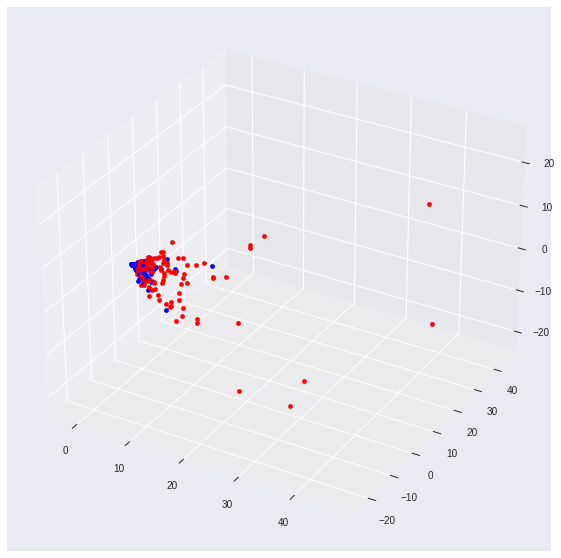

In [97]:
plot_3d_data(X_kpca_r,y.to_numpy(), (10,10))

Model : dtg4


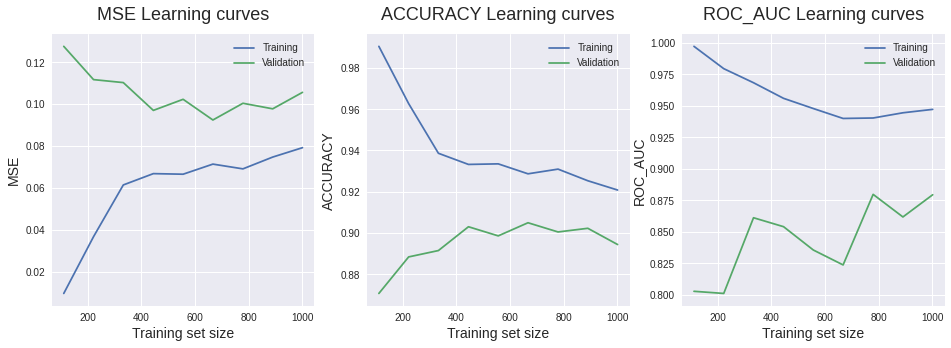

mACC:0.903
mAUC:0.855
<----------------------------------->

Model : dte4


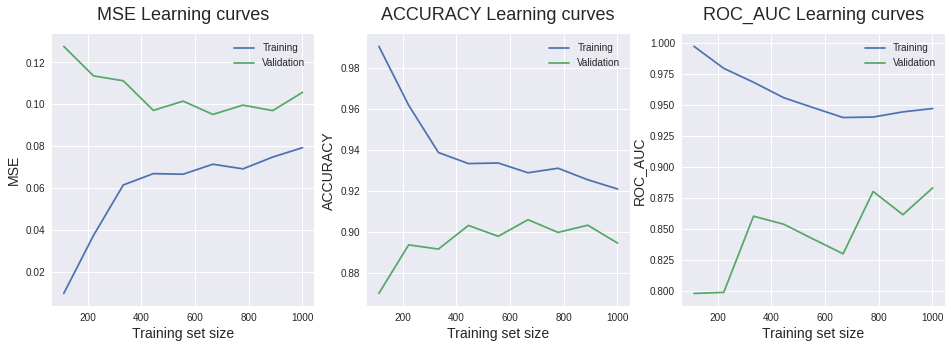

mACC:0.903
mAUC:0.857
<----------------------------------->

Model : dte3


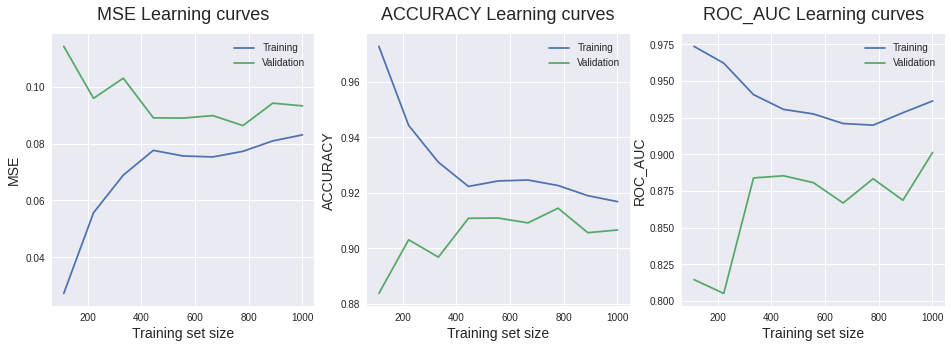

mACC:0.91
mAUC:0.873
<----------------------------------->

Model : dtg3


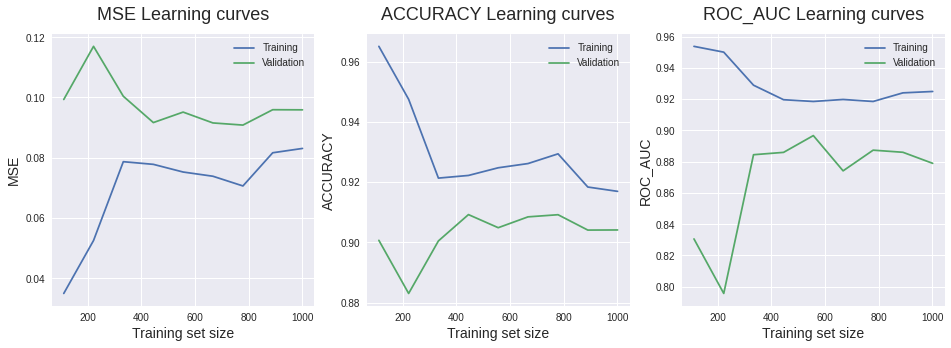

mACC:0.907
mAUC:0.882
<----------------------------------->

Model : svm_r


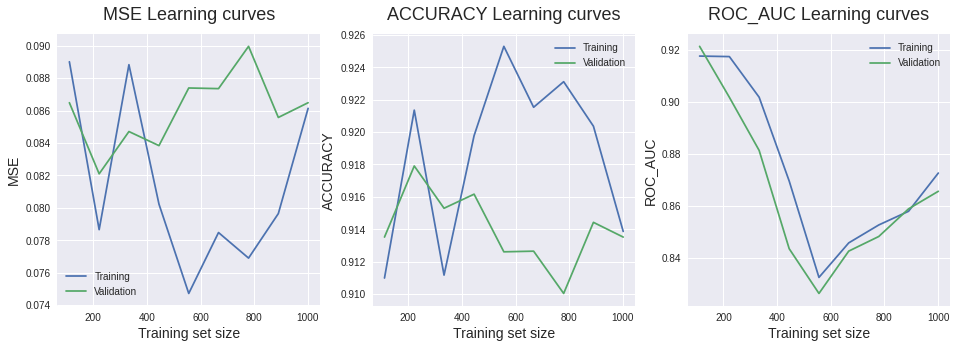

mACC:0.912
mAUC:0.85
<----------------------------------->

Model : svm_p


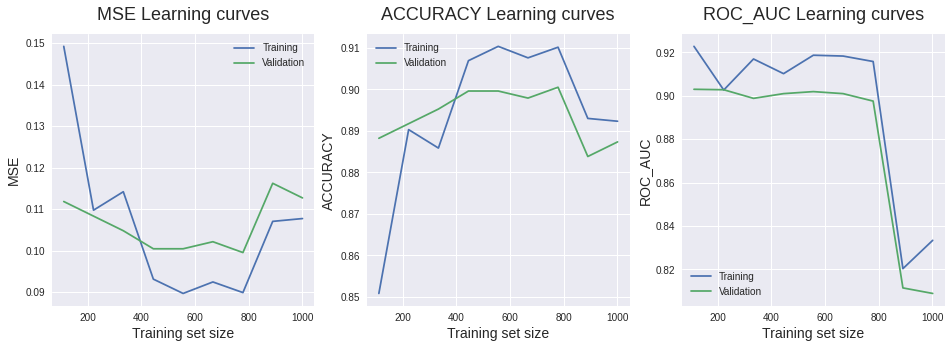

mACC:0.894
mAUC:0.87
<----------------------------------->

Model : lr


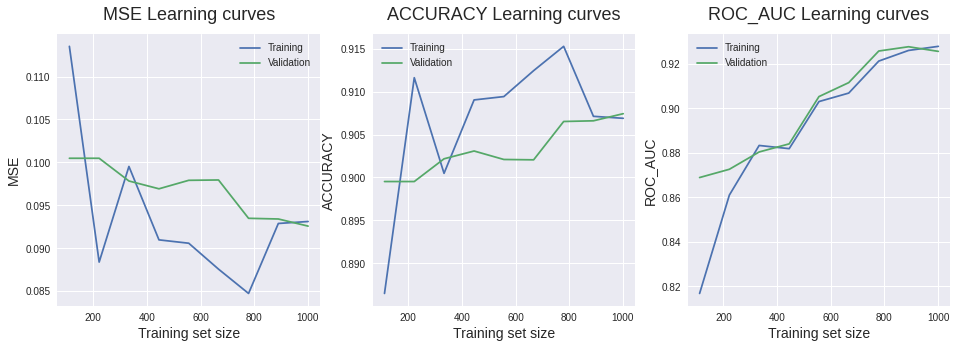

mACC:0.905
mAUC:0.922
<----------------------------------->



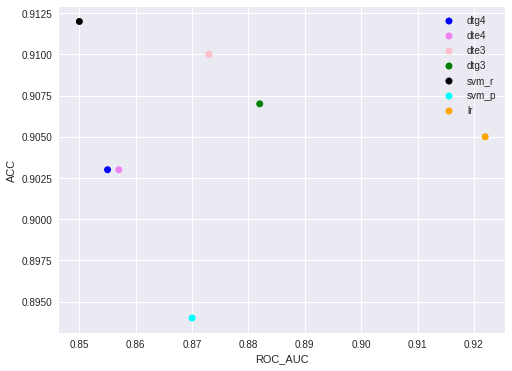

In [72]:
#performance_comparer(X_kpca_r,y)
performance_comparer_plus(X_kpca_r, y, models, models_label)

In [206]:
kpca4 = KernelPCA(n_components=6, kernel='linear')
X_kpca4_r = kpca4.fit_transform(X_t)

Model : dtg4


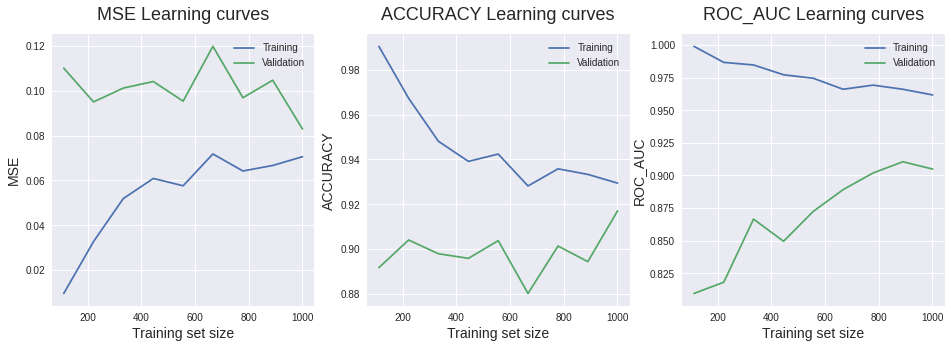

mACC:0.892
mAUC:0.901
<----------------------------------->

Model : dte4


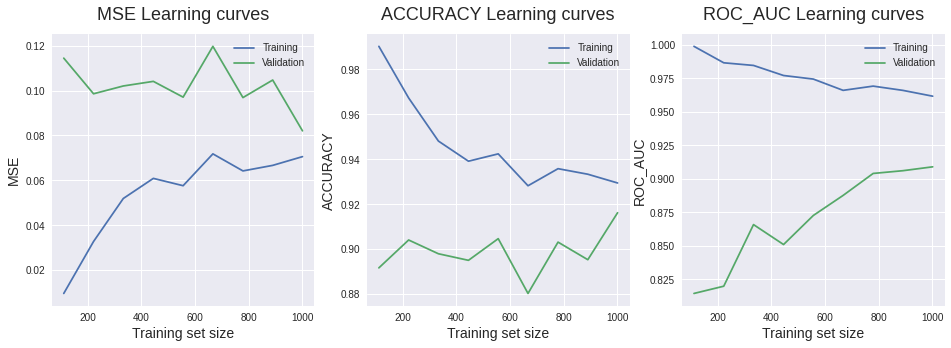

mACC:0.893
mAUC:0.899
<----------------------------------->

Model : dte3


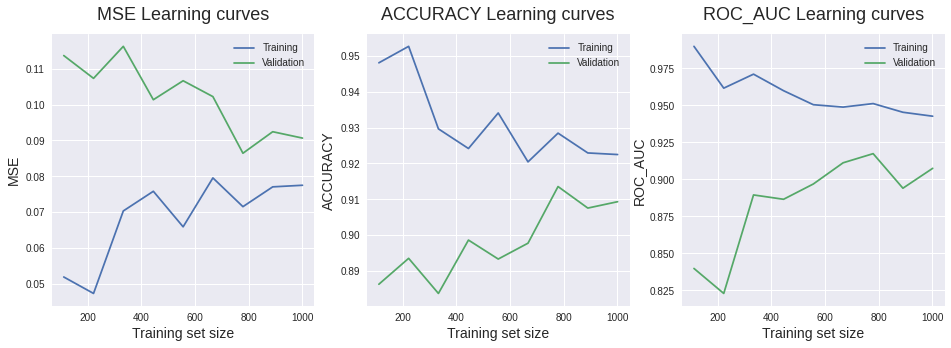

mACC:0.906
mAUC:0.907
<----------------------------------->

Model : dtg3


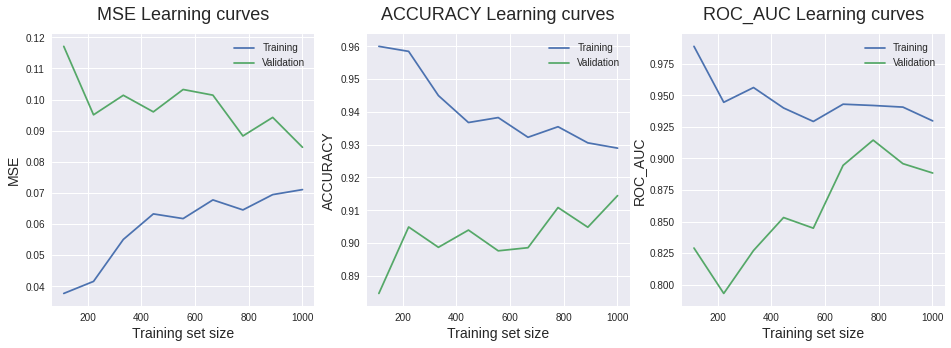

mACC:0.905
mAUC:0.902
<----------------------------------->

Model : svm_r


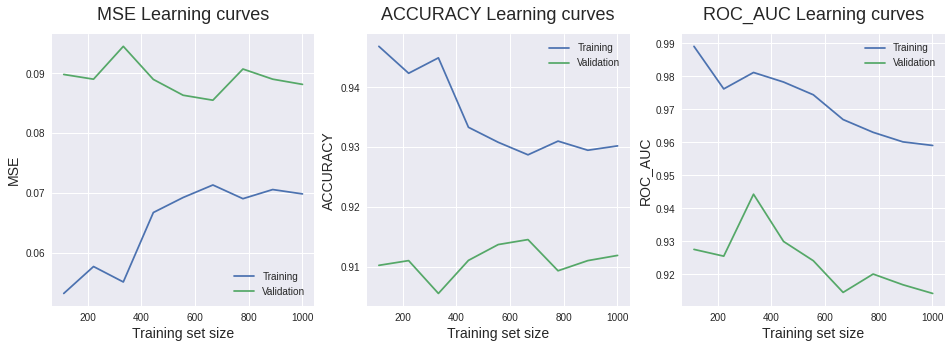

mACC:0.912
mAUC:0.917
<----------------------------------->

Model : svm_p


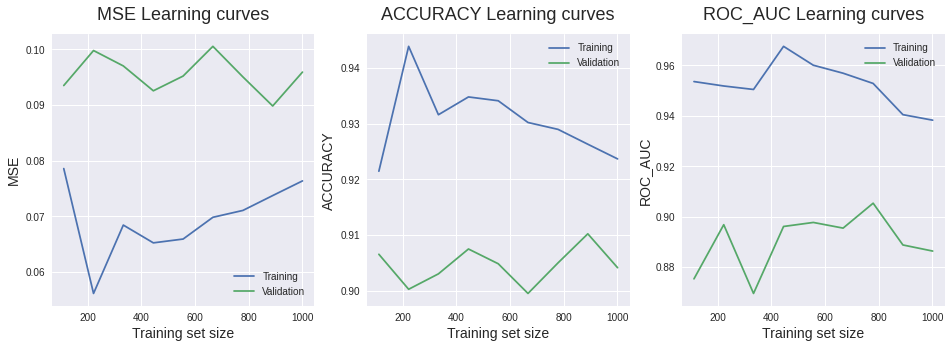

mACC:0.905
mAUC:0.897
<----------------------------------->

Model : lr


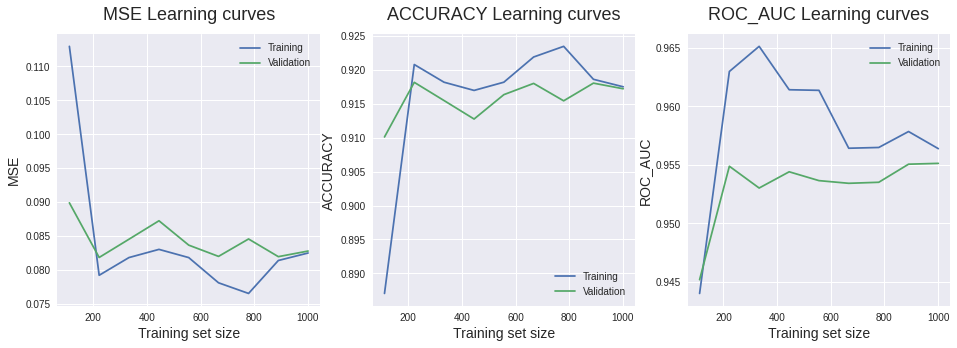

mACC:0.917
mAUC:0.954
<----------------------------------->



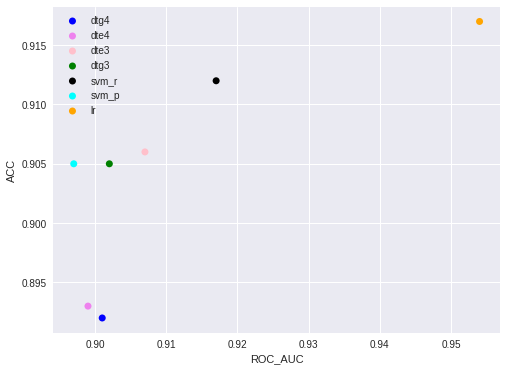

In [207]:
performance_comparer_plus(X_kpca4_r, y, models, models_label)

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
lda = LinearDiscriminantAnalysis()
X_lda_r = lda.fit_transform(X_t, y)
print('explained variance ratio (for components): %s'%str(lda.explained_variance_ratio_))

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model : dtg4


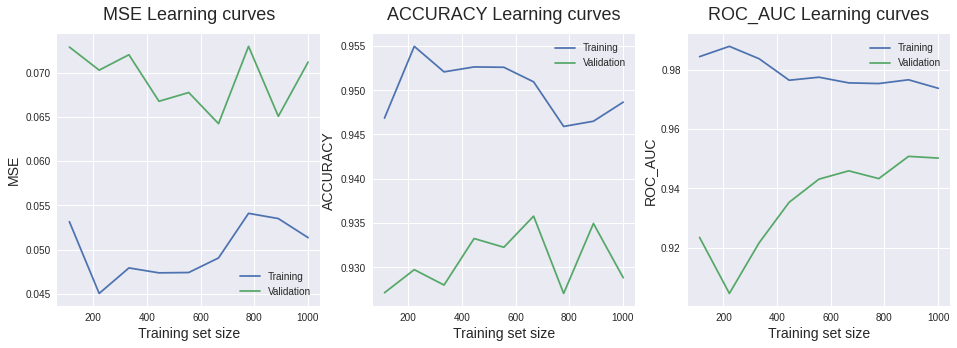

mACC:0.933
mAUC:0.947
<----------------------------------->

Model : dte4


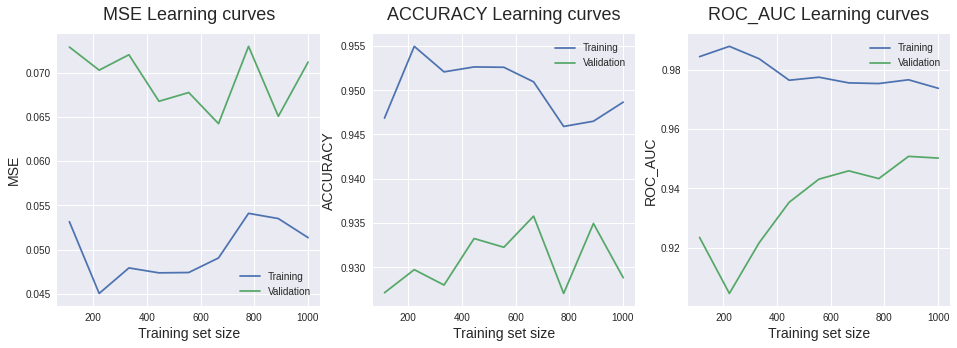

mACC:0.933
mAUC:0.947
<----------------------------------->

Model : dte3


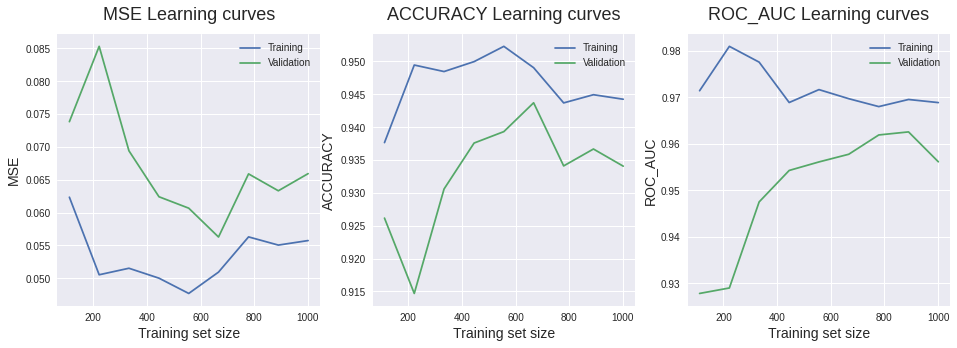

mACC:0.938
mAUC:0.961
<----------------------------------->

Model : dtg3


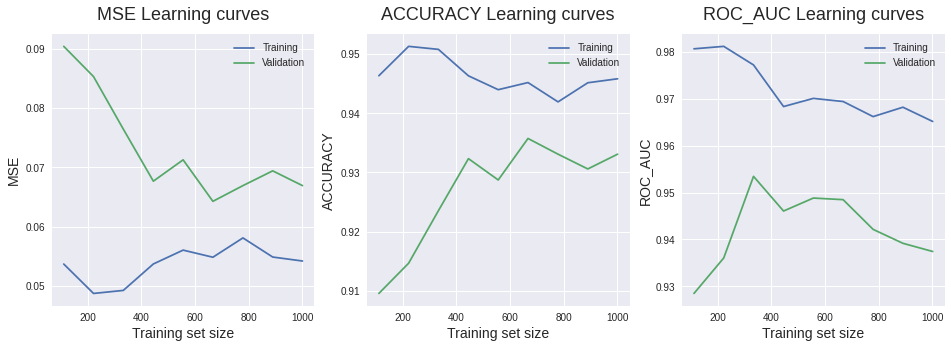

mACC:0.933
mAUC:0.943
<----------------------------------->

Model : svm_r


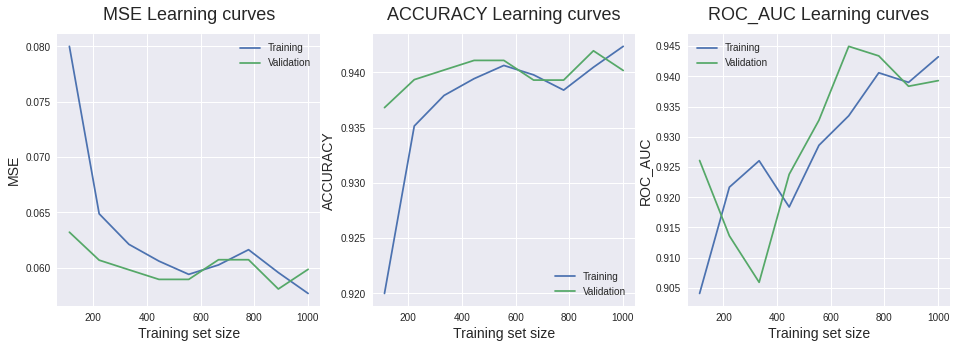

mACC:0.94
mAUC:0.942
<----------------------------------->

Model : svm_p


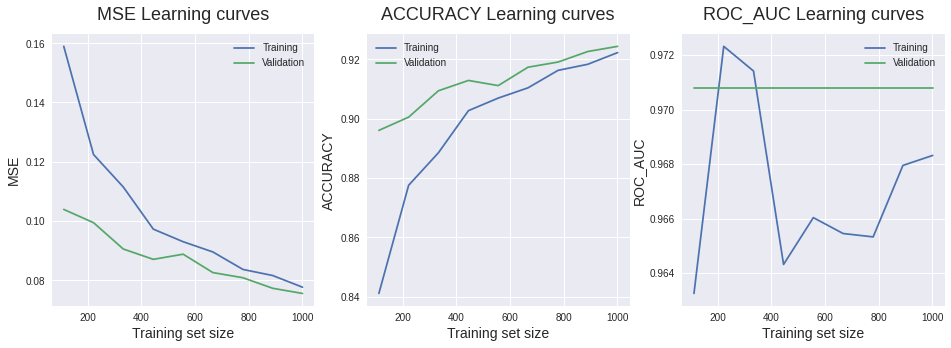

mACC:0.92
mAUC:0.971
<----------------------------------->

Model : lr


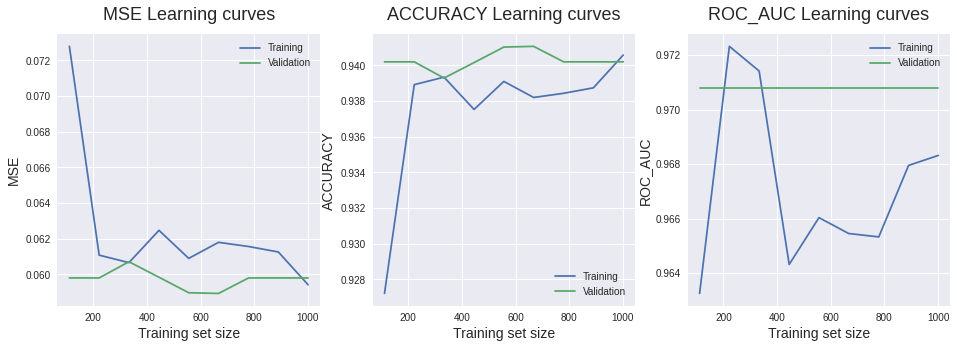

mACC:0.94
mAUC:0.971
<----------------------------------->



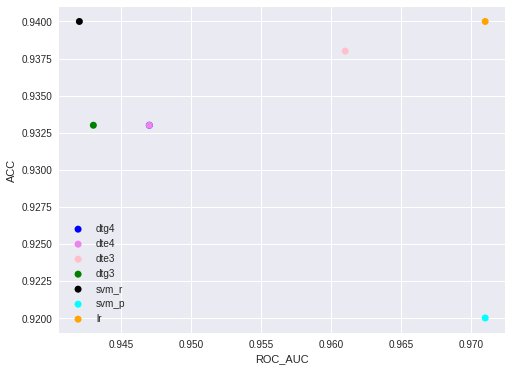

In [76]:
#performance_comparer(X_lda_r, y)
performance_comparer_plus(X_lda_r, y, models, models_label)

In [95]:
from Models.functions.learning_curve import learning_curves_describe

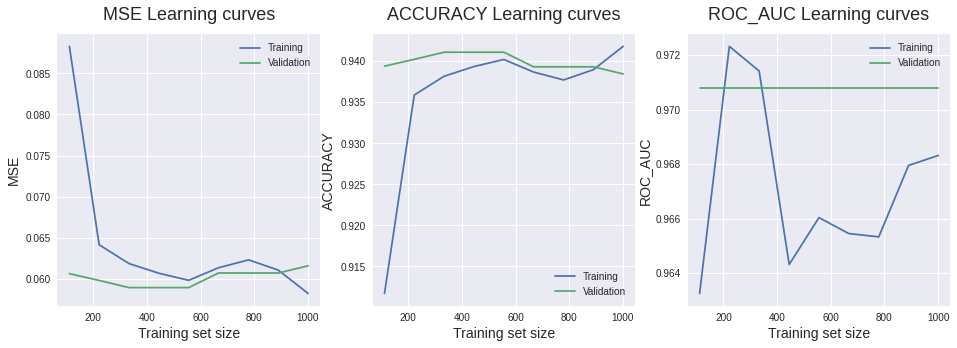

(0.939, 0.971)

In [110]:
svml_clf = SVC(kernel='linear', probability=True)
learning_curves_describe(svml_clf, X_lda_r, y)

In [80]:
from sklearn.pipeline import Pipeline
_sc = StandardScaler()

In [139]:
_lda = LinearDiscriminantAnalysis()
log_regress_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor', LogisticRegression(max_iter=10000, solver='liblinear'))
])

svml_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  SVC(kernel='linear', probability=True))
])

svmp_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  SVC(kernel='poly', probability=True))
])

svmr_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  SVC(kernel='rbf', probability=True))
])

dte3_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  DecisionTreeClassifier(criterion='entropy', max_depth=3))
])

dtg3_lda_model = Pipeline([
    ('std_scaler', _sc),
    ('lda', _lda),
    ('regressor',  DecisionTreeClassifier(criterion='gini', max_depth=3))
])

In [118]:
from Models.functions.metrics import train_with_cv

In [140]:
train_with_cv(log_regress_lda_model, X_r, y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9623
El resultado ACC promediado es 0.9374
El resultado CK promediado es 0.7042


/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9374308300395258, 0.9622807017543861, 0.7042006070670136)

In [141]:
train_with_cv(svml_lda_model, X_r, y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9623
El resultado ACC promediado es 0.9365
El resultado CK promediado es 0.7010


(0.9365217391304348, 0.9622807017543861, 0.700971104739767)

In [142]:
train_with_cv(svmp_lda_model, X_r, y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9623
El resultado ACC promediado es 0.9215
El resultado CK promediado es 0.5859


/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9215415019762847, 0.9622807017543861, 0.5859494218307454)

In [143]:
train_with_cv(svmr_lda_model, X_r, y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9396
El resultado ACC promediado es 0.9374
El resultado CK promediado es 0.7063


/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9373913043478261, 0.9396491228070176, 0.7063273173948919)

In [144]:
train_with_cv(dte3_lda_model, X_r, y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9421
El resultado ACC promediado es 0.9321
El resultado CK promediado es 0.6739


/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9321343873517788, 0.9421315789473685, 0.6738686931097996)

In [145]:
train_with_cv(dtg3_lda_model, X_r, y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9495
El resultado ACC promediado es 0.9313
El resultado CK promediado es 0.6733


/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9312648221343873, 0.9495263157894737, 0.6733342125677596)

In [123]:
pca = PCA()
# perform PCA on the scaled data
pca.fit(X_t)

PCA()

In [124]:

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[54.19308162 15.03988374  8.83604512  6.24324041  5.60200344  3.0962188
  2.06827084  1.75542425  1.12664108  0.6703788   0.46668426  0.36622962
  0.26531457  0.19524366  0.07533979]



In [125]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 54.19308162  69.23296536  78.06901048  84.31225089  89.91425433
  93.01047313  95.07874397  96.83416822  97.9608093   98.6311881
  99.09787236  99.46410198  99.72941655  99.92466021 100.        ]



Text(0, 0.5, 'Explained variance (%)')

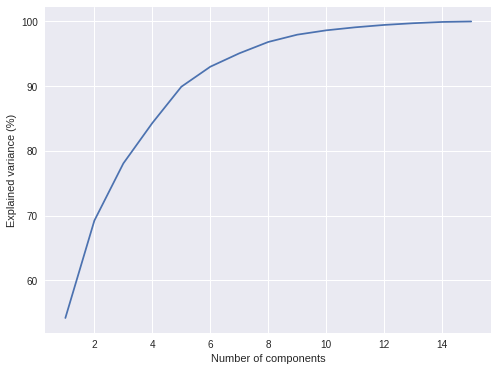

In [126]:
# plot a scree plot
components = None
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[54.19308162 69.23296536 78.06901048 84.31225089 89.91425433 93.01047313]
Number of components: 6


Text(0, 0.5, 'Explained variance (%)')

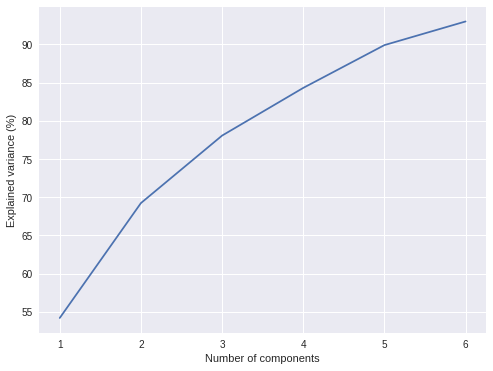

In [127]:
pca = PCA(n_components = 0.9)
pca.fit(X_t)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [128]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.26855974 0.31135375 0.18524806 0.1674752  0.32389388 0.20365144
  0.33435268 0.04648753 0.31936237 0.32063612 0.21795449 0.33648876
  0.15503724 0.10783371 0.32717337]
 [0.05041856 0.00460063 0.44848436 0.16760562 0.04958696 0.29905528
  0.08146383 0.26192472 0.20553504 0.04468048 0.41755375 0.07169007
  0.47573906 0.38598415 0.04505633]
 [0.27282002 0.07035125 0.29919333 0.57186163 0.06768354 0.2450477
  0.09175587 0.40288571 0.0654092  0.25520069 0.0998623  0.07487345
  0.28220684 0.2611088  0.18949756]
 [0.11800643 0.24571486 0.06844022 0.32019572 0.00502253 0.34905834
  0.003234   0.62516408 0.00988463 0.14696691 0.22954114 0.01276722
  0.2074438  0.42048269 0.1067429 ]
 [0.17250289 0.23137776 0.21903844 0.01169351 0.09794421 0.36541719
  0.02269835 0.52570826 0.01357302 0.09242083 0.34425519 0.15405892
  0.05563827 0.53460775 0.09334156]
 [0.47002418 0.15433367 0.29784202 0.58643488 0.09773968 0.4524127
  0.03923049 0.01739529 0.228209   0.13159996 0.15134052 0.05356736
  0.09

In [129]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['H_bt', 'R_bt', 'Rrep_bt', '2B_bt']
Component 1: ['SB_bt', 'SLG_bt', 'HR_bt', 'Rbaser_bt']
Component 2: ['OBP_bt', 'Rfield_bt', 'SLG_bt', 'SB_bt']
Component 3: ['Rfield_bt', 'Rbaser_bt', '3B_bt', 'OBP_bt']
Component 4: ['Rbaser_bt', 'Rfield_bt', '3B_bt', 'HR_bt']
Component 5: ['OBP_bt', 'total_seasons', '3B_bt', 'SLG_bt']


In [130]:
X_pca = pca.transform(X_t)
print(X_pca.shape)
print(X_pca)

(1136, 6)
[[-2.47045256e+00 -7.60388767e-01  9.74869319e-01  1.18681008e+00
  -1.20412783e+00 -7.91483284e-01]
 [ 1.21076525e+01 -1.50544655e+00  1.28794898e+00  5.31618930e-01
   3.16413305e+00  4.73516154e-01]
 [-2.17418964e+00  4.70220888e-01 -2.45245866e-01  1.85751822e-01
  -2.17668753e-01 -3.03228521e-01]
 ...
 [-5.92410929e-01 -1.96765149e+00  6.76657372e-03 -2.22882830e-02
  -2.33923974e-02  1.46513861e-01]
 [ 1.49191053e+00 -2.24678217e+00  1.08515021e+00  1.15693230e+00
  -1.87720492e+00 -9.73141908e-02]
 [-8.63419068e-01  1.23789466e+00  1.32207711e+00 -1.76816713e+00
   7.11487852e-02 -6.27578442e-01]]


Model : dtg4


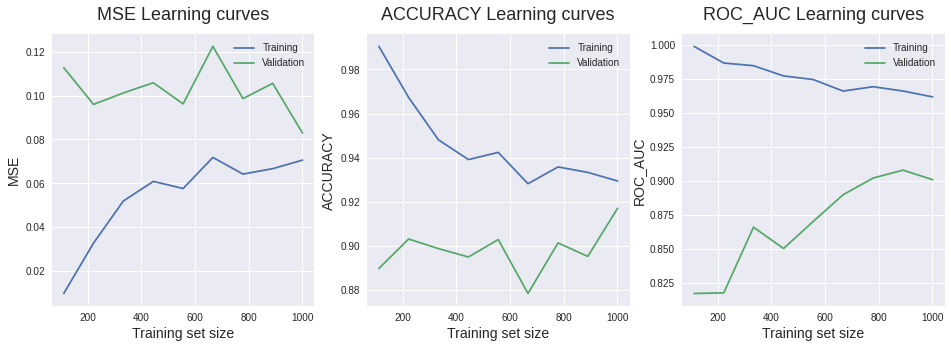

mACC:0.892
mAUC:0.9
<----------------------------------->

Model : dte4


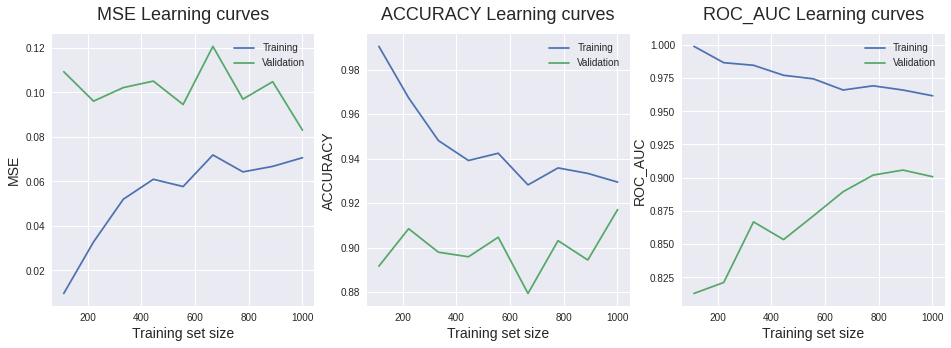

mACC:0.892
mAUC:0.899
<----------------------------------->

Model : dte3


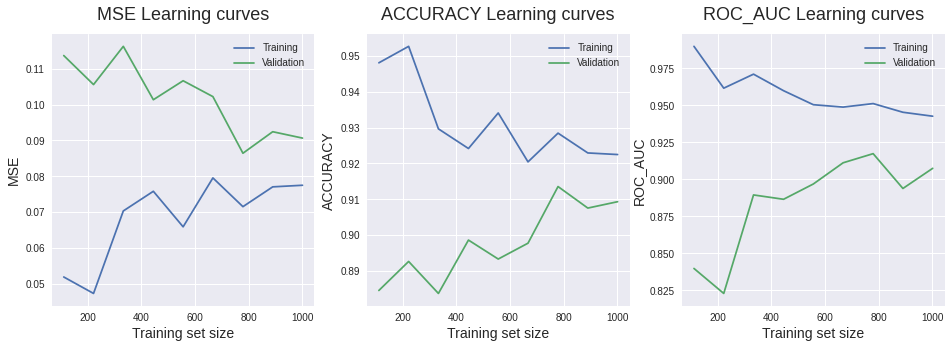

mACC:0.906
mAUC:0.907
<----------------------------------->

Model : dtg3


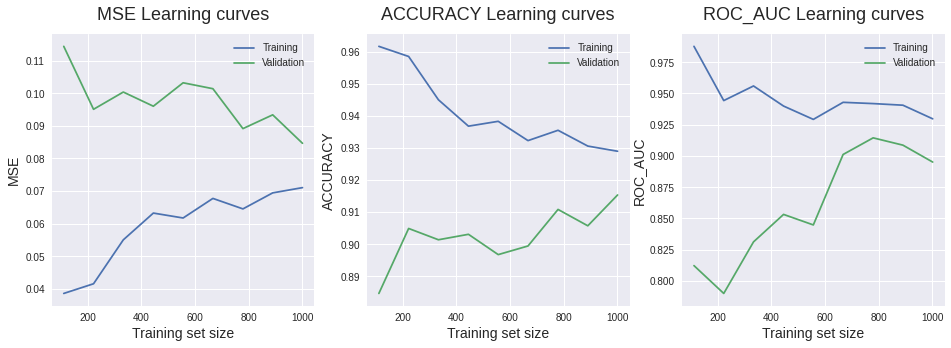

mACC:0.905
mAUC:0.908
<----------------------------------->

Model : svm_r


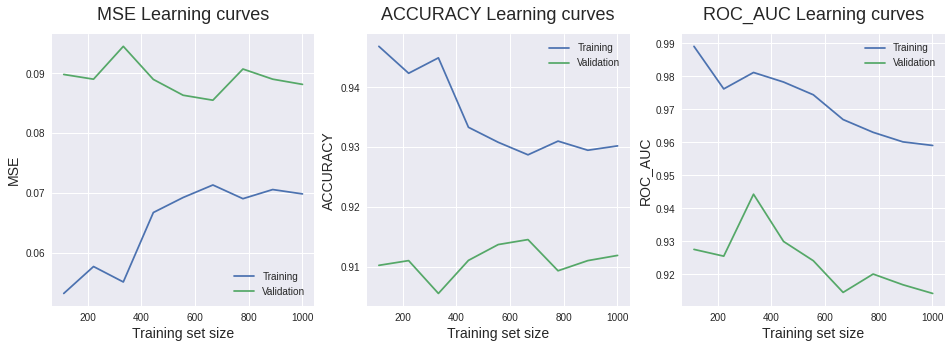

mACC:0.912
mAUC:0.917
<----------------------------------->

Model : svm_p


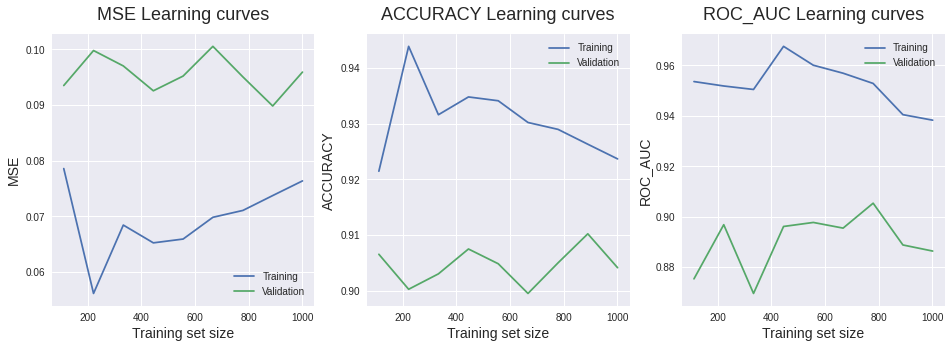

mACC:0.905
mAUC:0.897
<----------------------------------->

Model : lr


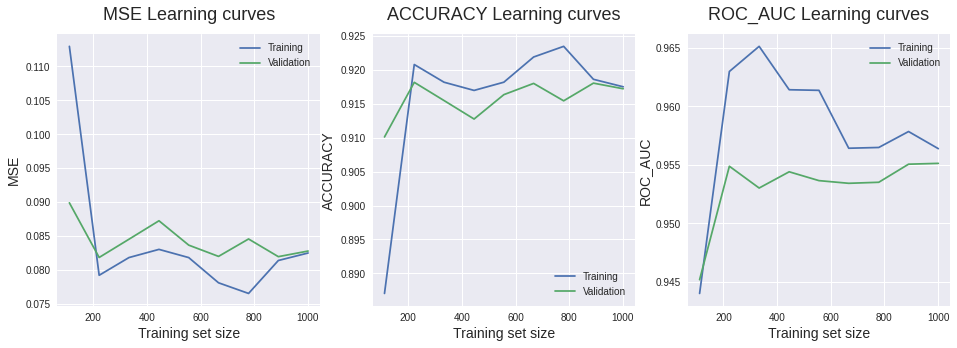

mACC:0.917
mAUC:0.954
<----------------------------------->



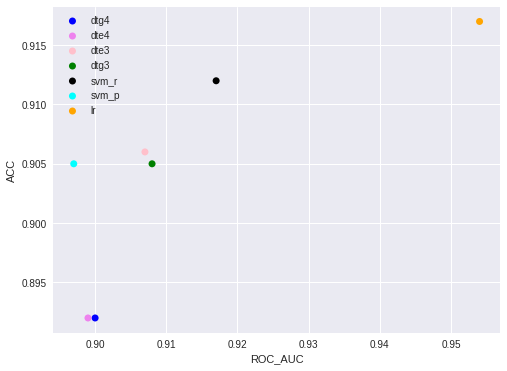

In [90]:
performance_comparer_plus(X_pca, y, models, models_label)
##performance_comparer(X_pca,y)

In [131]:
_pca = PCA(n_components = components)
_model = LogisticRegression(max_iter=10000, solver='liblinear')
log_regress_pca_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [132]:
train_with_cv(log_regress_pca_model, X_r,y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

El resultado AUC promediado es 0.9508
El resultado ACC promediado es 0.9206
El resultado CK promediado es 0.6072


/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9206324110671937, 0.9508070175438595, 0.6072051896346273)

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.3,shuffle=True, random_state=113)


In [148]:
log_regress_pca_model.fit(X_train,y_train)
log_regress_lda_model.fit(X_train,y_train)
svml_lda_model.fit(X_train,y_train)
svmr_lda_model.fit(X_train,y_train)
svmp_lda_model.fit(X_train,y_train)
dtg3_lda_model.fit(X_train,y_train)
dte3_lda_model.fit(X_train,y_train)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis()),
                ('regressor',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

In [133]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
test_gt_condition = {
    'WAR_bt':10,
    "total_seasons":10,
    'retirament_decade':2010
}

recent_retirement_df = filter_dataset(inactive_bat_df, mayor_league_condition, test_gt_condition, None, None)

In [134]:
recent_retirement_df.shape

(216, 78)

In [135]:
X_unused_test = recent_retirement_df[reduced_features]
y_unused_test = recent_retirement_df["HoF"]

In [136]:
y_unused_test.value_counts()

0    209
1      7
Name: HoF, dtype: int64

In [149]:
print(f"log_regress_pca_model: {log_regress_pca_model.score(X_unused_test, y_unused_test)}") 
print(f"log_regress_lda_model: {log_regress_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"svml_lda_model: {svml_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"svmr_lda_model: {svmr_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"svmp_lda_model: {svmp_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"dtg3_lda_model: {dtg3_lda_model.score(X_unused_test, y_unused_test)}") 
print(f"dte3_lda_model: {dte3_lda_model.score(X_unused_test, y_unused_test)}") 


log_regress_pca_model: 0.9305555555555556
log_regress_lda_model: 0.9537037037037037
svml_lda_model: 0.9537037037037037
svmr_lda_model: 0.9537037037037037
svmp_lda_model: 0.9583333333333334
dtg3_lda_model: 0.9398148148148148
dte3_lda_model: 0.9537037037037037


In [151]:
def compute_prediction(model,X_u, y_u):
    computes = []
    for i in range(len(X_u)):
        p_pred = model.predict_proba(X_u.iloc[i].to_numpy().reshape(1,-1))
        hof = y_u.iloc[i]
        computes.append((recent_retirement_df.iloc[i]['Name'],round(p_pred[0][1],3),hof))
    computes.sort(key= lambda x: x[1], reverse=True)
    return computes
        #print(f"{test_df.iloc[i]['Name']} ---->  HOF_proba: {round(p_pred[0][1],3)} <----- real Hof status:{hof}")

In [154]:
def print_filter_result(table,proba=0.5):
    for p in table:
        if p[1] >= proba or p[2] == 1:
            print(p)
    return
            

In [166]:
import pickle
def pickle_save(path, model):
    with open(path, 'wb') as file:
        pickle.dump(model, file)
    return

In [167]:
print_filter_result(compute_prediction_test(log_regress_pca_model, X_unused_test, y_unused_test))
path = 'trained_models/log_regress_pca_model.pkl'
pickle_save(path, log_regress_pca_model)

/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

('Alex Rodriguez', 0.996, 0)
('Adrian Beltre', 0.987, 0)
('Todd Helton', 0.95, 0)
('Chipper Jones', 0.94, 1)
('Ken Griffey Jr.', 0.937, 1)
('Scott Rolen', 0.913, 0)
('Carlos Beltran', 0.894, 0)
('Jim Thome', 0.861, 1)
('Andruw Jones', 0.854, 0)
('Ivan Rodriguez', 0.854, 1)
('Ichiro Suzuki', 0.837, 0)
('Bobby Abreu', 0.823, 0)
('Manny Ramirez', 0.788, 0)
('Vladimir Guerrero', 0.77, 1)
('Chase Utley', 0.75, 0)
('Johnny Damon', 0.743, 0)
('David Ortiz', 0.734, 1)
('Jim Edmonds', 0.618, 0)
('Omar Vizquel', 0.553, 0)
('Lance Berkman', 0.544, 0)
('Derek Jeter', 0.382, 1)


/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

In [168]:
print_filter_result(compute_prediction_test(log_regress_lda_model, X_unused_test, y_unused_test))
path = 'trained_models/log_regress_lda_model.pkl'
pickle_save(path, log_regress_lda_model)

/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

('Alex Rodriguez', 1.0, 0)
('Adrian Beltre', 0.989, 0)
('Chipper Jones', 0.965, 1)
('Ichiro Suzuki', 0.965, 0)
('Ken Griffey Jr.', 0.955, 1)
('Derek Jeter', 0.933, 1)
('Carlos Beltran', 0.863, 0)
('Ivan Rodriguez', 0.851, 1)
('Vladimir Guerrero', 0.76, 1)
('Scott Rolen', 0.757, 0)
('Chase Utley', 0.747, 0)
('Todd Helton', 0.627, 0)
('Manny Ramirez', 0.585, 0)
('Jim Thome', 0.374, 1)
('David Ortiz', 0.058, 1)


/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

In [160]:
print_filter_result(compute_prediction_test(svml_lda_model, X_unused_test, y_unused_test))

/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

('Alex Rodriguez', 1.0, 0)
('Adrian Beltre', 0.991, 0)
('Ichiro Suzuki', 0.969, 0)
('Chipper Jones', 0.968, 1)
('Ken Griffey Jr.', 0.959, 1)
('Derek Jeter', 0.937, 1)
('Carlos Beltran', 0.868, 0)
('Ivan Rodriguez', 0.855, 1)
('Vladimir Guerrero', 0.761, 1)
('Scott Rolen', 0.758, 0)
('Chase Utley', 0.747, 0)
('Todd Helton', 0.622, 0)
('Manny Ramirez', 0.577, 0)
('Jim Thome', 0.359, 1)
('David Ortiz', 0.051, 1)


/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

In [171]:
print_filter_result(compute_prediction_test(svmp_lda_model, X_unused_test, y_unused_test))
path = 'trained_models/svmp_lda_model.pkl'
pickle_save(path, svmp_lda_model)

/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

('Adrian Beltre', 1.0, 0)
('Ken Griffey Jr.', 1.0, 1)
('Chipper Jones', 1.0, 1)
('Alex Rodriguez', 1.0, 0)
('Ichiro Suzuki', 1.0, 0)
('Derek Jeter', 0.988, 1)
('Carlos Beltran', 0.884, 0)
('Ivan Rodriguez', 0.854, 1)
('Vladimir Guerrero', 0.605, 1)
('Scott Rolen', 0.597, 0)
('Chase Utley', 0.569, 0)
('Jim Thome', 0.133, 1)
('David Ortiz', 0.064, 1)


/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

In [169]:
print_filter_result(compute_prediction_test(dtg3_lda_model, X_unused_test, y_unused_test))
path = 'trained_models/dtg3_lda_model.pkl'
pickle_save(path, dtg3_lda_model)

/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

('Hunter Pence', 1.0, 0)
('Adrian Beltre', 0.979, 0)
('Ken Griffey Jr.', 0.979, 1)
('Derek Jeter', 0.979, 1)
('Chipper Jones', 0.979, 1)
('Alex Rodriguez', 0.979, 0)
('Ichiro Suzuki', 0.979, 0)
('Carlos Beltran', 0.771, 0)
('Vladimir Guerrero', 0.771, 1)
('Todd Helton', 0.771, 0)
('Ivan Rodriguez', 0.771, 1)
('Scott Rolen', 0.771, 0)
('Chase Utley', 0.771, 0)
('Johnny Damon', 0.543, 0)
('Andruw Jones', 0.543, 0)
('Joe Mauer', 0.543, 0)
('Placido Polanco', 0.543, 0)
('Jim Thome', 0.543, 1)
('David Ortiz', 0.081, 1)


/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

In [170]:
print_filter_result(compute_prediction_test(dte3_lda_model, X_unused_test, y_unused_test))
path = 'trained_models/dte3_lda_model.pkl'
pickle_save(path, dte3_lda_model)

/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

('Adrian Beltre', 1.0, 0)
('Hunter Pence', 1.0, 0)
('Alex Rodriguez', 1.0, 0)
('Ken Griffey Jr.', 0.955, 1)
('Derek Jeter', 0.955, 1)
('Chipper Jones', 0.955, 1)
('Ichiro Suzuki', 0.955, 0)
('Carlos Beltran', 0.771, 0)
('Vladimir Guerrero', 0.771, 1)
('Todd Helton', 0.771, 0)
('Ivan Rodriguez', 0.771, 1)
('Scott Rolen', 0.771, 0)
('Chase Utley', 0.771, 0)
('Johnny Damon', 0.5, 0)
('Andruw Jones', 0.5, 0)
('Joe Mauer', 0.5, 0)
('Placido Polanco', 0.5, 0)
('Manny Ramirez', 0.5, 0)
('Jim Thome', 0.5, 1)
('David Ortiz', 0.081, 1)


/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe